In [1]:
import networkx as nx
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#We read data by using read_csv and set names for each column accordingly.
data_G = pd.read_csv('sx-stackoverflow.txt', delim_whitespace=True, names=['source_id', 'target_id', 'timestamp'])

#We create a small dataset in order to speed up our calculations. 
#In case you want to implement all the values remove the line below.
data_G = data_G.iloc[0:2000]

# Question 1

## Calculation of time t_min and t_max

In [3]:
#We find the min and max value from timestamp

t_min=data_G.timestamp.min()
t_max=data_G.timestamp.max()

# Question 2

## Data separation and time interval creation

In [4]:
#We find DT from the difference between t_max and t_min
DT = t_max - t_min

DT

671517

In [5]:
#We allow the user to set a specific diviation for each time range.
N = int(input('Please give number of intervals: '))

dt = DT // N
dt

Please give number of intervals: 15


44767

In [6]:
print('Min Timestamp =', pd.to_datetime(t_min, unit='s'))
print('Max Timestamp =', pd.to_datetime(t_max, unit='s'))
print('DT =', DT)
print('Time range =', dt)

Min Timestamp = 2008-08-01 05:17:57
Max Timestamp = 2008-08-08 23:49:54
DT = 671517
Time range = 44767


In [7]:
#We set time intervals for each N
time_intervals = []

for i in range(0, N):

    #Start of time interval
    time_start = t_min + i * dt
        
    #End of time interval
    time_end = t_min + (i+1) * dt
    print("Interval = ", i)
    print("Start = ",pd.to_datetime(time_start, unit='s'))
    print("End = ",pd.to_datetime(time_end, unit='s'))

    time_intervals.append([int(time_start),int(time_end)])

Interval =  0
Start =  2008-08-01 05:17:57
End =  2008-08-01 17:44:04
Interval =  1
Start =  2008-08-01 17:44:04
End =  2008-08-02 06:10:11
Interval =  2
Start =  2008-08-02 06:10:11
End =  2008-08-02 18:36:18
Interval =  3
Start =  2008-08-02 18:36:18
End =  2008-08-03 07:02:25
Interval =  4
Start =  2008-08-03 07:02:25
End =  2008-08-03 19:28:32
Interval =  5
Start =  2008-08-03 19:28:32
End =  2008-08-04 07:54:39
Interval =  6
Start =  2008-08-04 07:54:39
End =  2008-08-04 20:20:46
Interval =  7
Start =  2008-08-04 20:20:46
End =  2008-08-05 08:46:53
Interval =  8
Start =  2008-08-05 08:46:53
End =  2008-08-05 21:13:00
Interval =  9
Start =  2008-08-05 21:13:00
End =  2008-08-06 09:39:07
Interval =  10
Start =  2008-08-06 09:39:07
End =  2008-08-06 22:05:14
Interval =  11
Start =  2008-08-06 22:05:14
End =  2008-08-07 10:31:21
Interval =  12
Start =  2008-08-07 10:31:21
End =  2008-08-07 22:57:28
Interval =  13
Start =  2008-08-07 22:57:28
End =  2008-08-08 11:23:35
Interval =  14
S

# Question 3

## Subgraphs creation

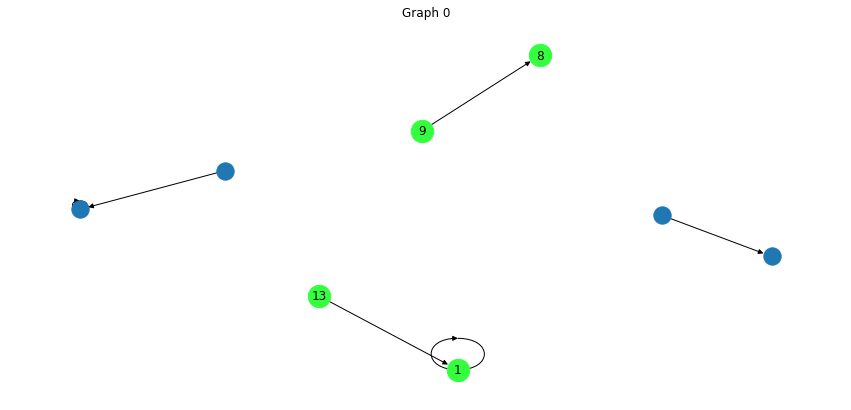

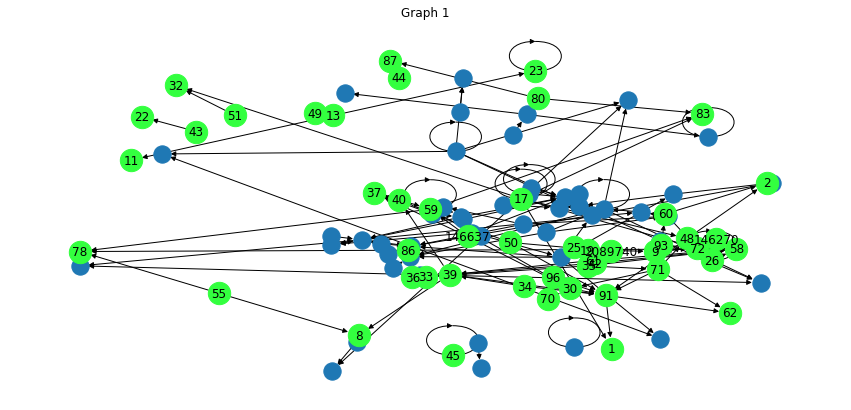

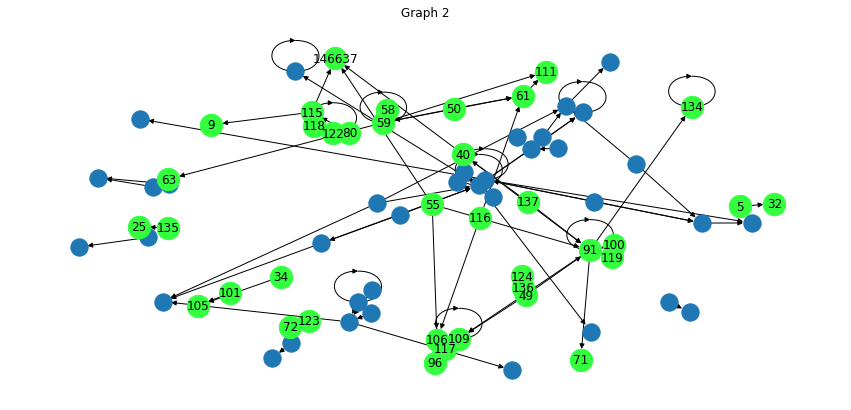

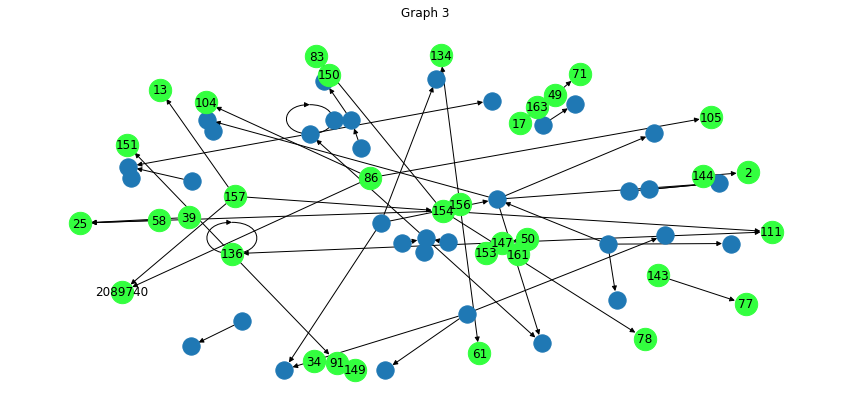

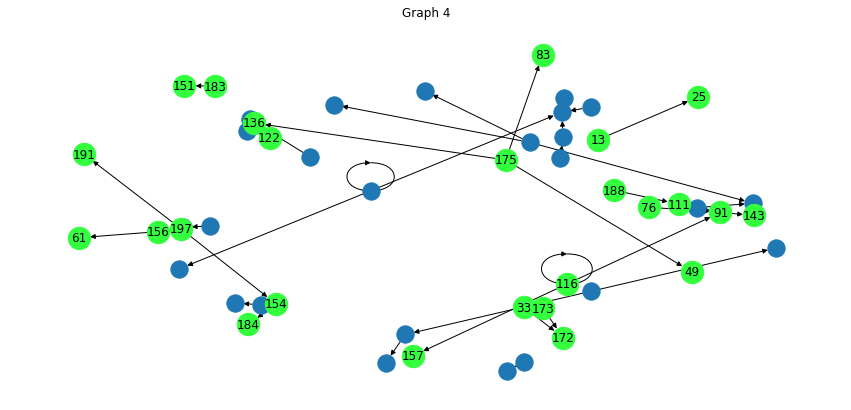

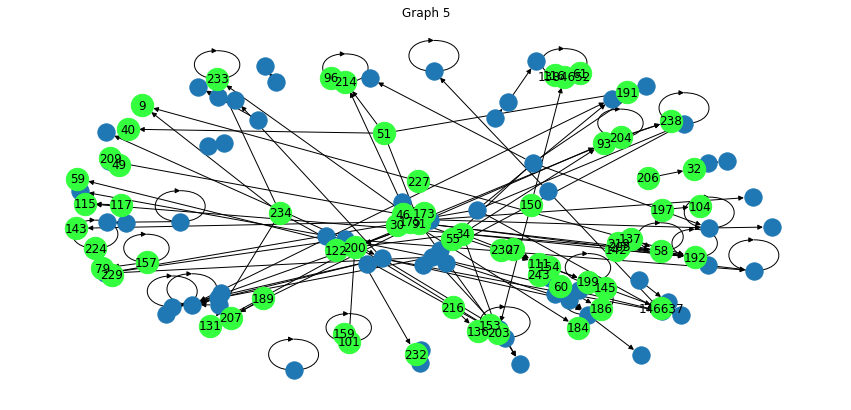

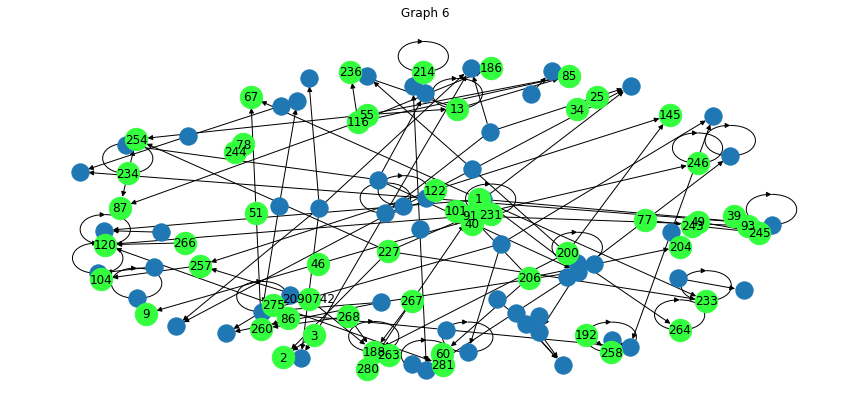

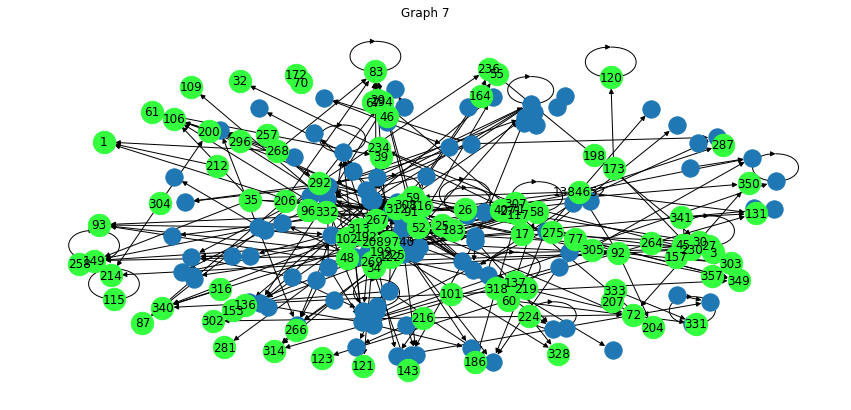

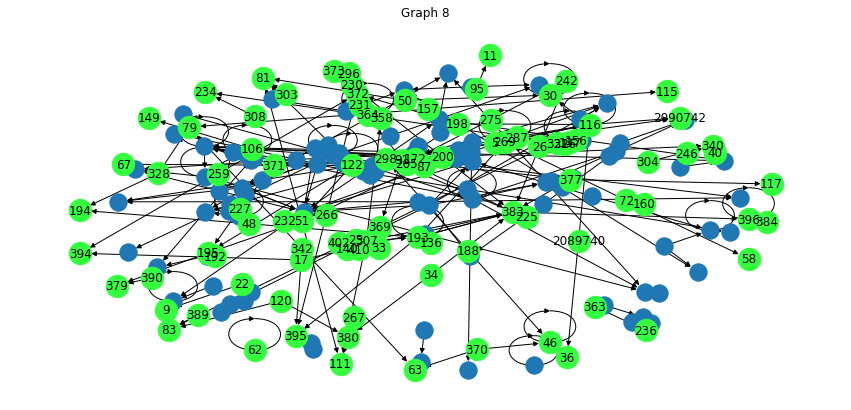

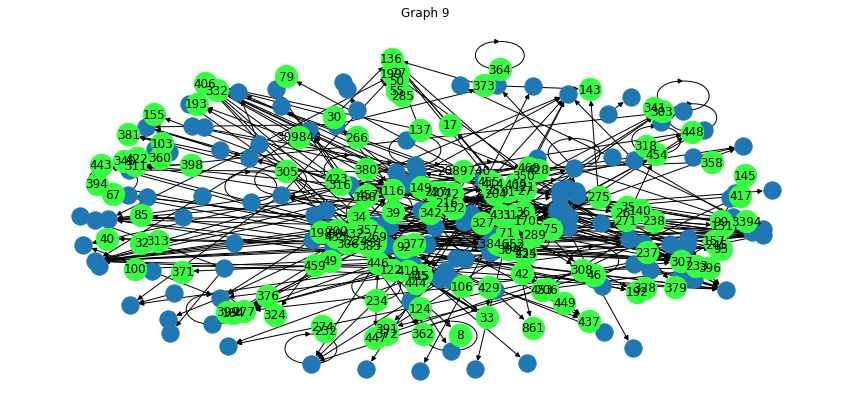

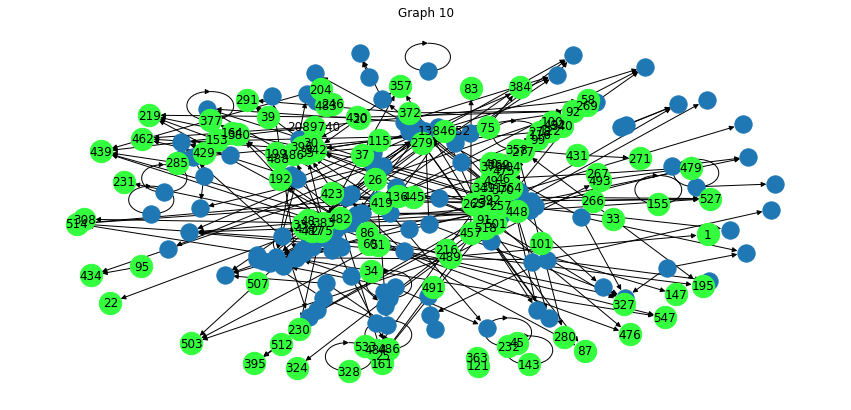

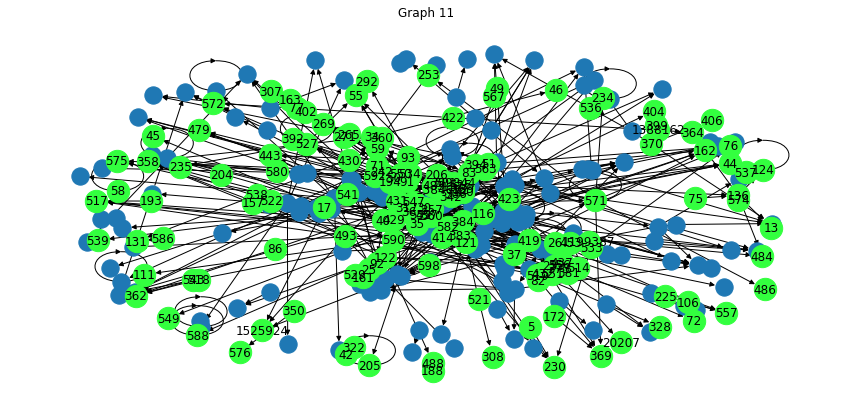

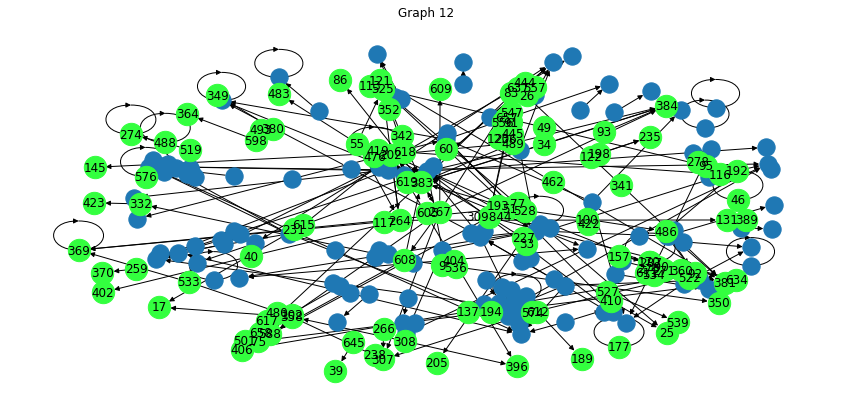

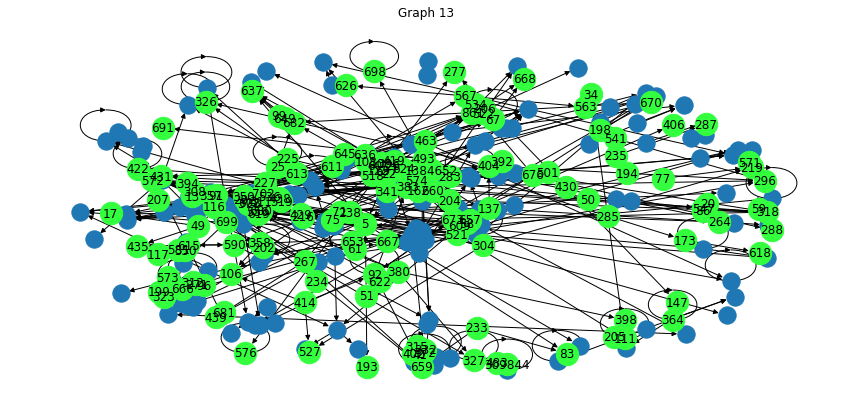

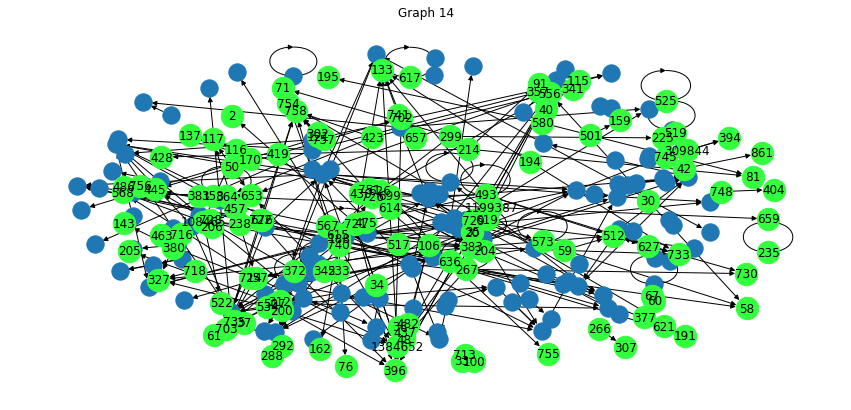

In [8]:
#Dictionary which holds all subgraphs
sub_Graphs = {}


for i in range(0, N):
    #Select data according to the time intervals
    start = time_intervals[i][0]
    end = time_intervals[i][1]
    
    sub_Graphs["index{0}".format(i)] = data_G.loc[(data_G['timestamp'] >= start) & (data_G['timestamp'] <= end)]

#Create subgraphs

for i in range(0, N):
    #We create graphs with from_pandas_edgelist.
    #We also create them as DiGraph in order to be able to calculate some specific centralities
    sub_Graphs["Graph{0}".format(i)] = nx.from_pandas_edgelist(sub_Graphs["index{0}".format(i)], 
                                                           'source_id', 
                                                           'target_id', 
                                                           'timestamp', 
                                                           create_using=nx.DiGraph())
    
    #We use networkX to draw the graph.
    plt.figure(figsize=(15,7))
    plt.title("Graph {0}".format(i))
    nx.draw(sub_Graphs["Graph{0}".format(i)])
    pos = nx.spring_layout(sub_Graphs["Graph{0}".format(i)])
    nx.draw_networkx(sub_Graphs["Graph{0}".format(i)], pos=pos, node_size=500, node_color="#33FF3F")
    plt.show()

# Question 4

## Centrality Measures

### Degree Centrality

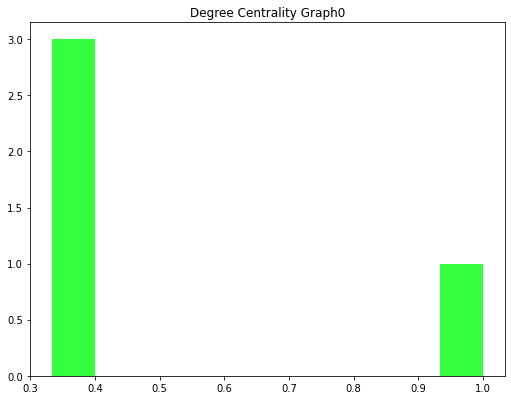

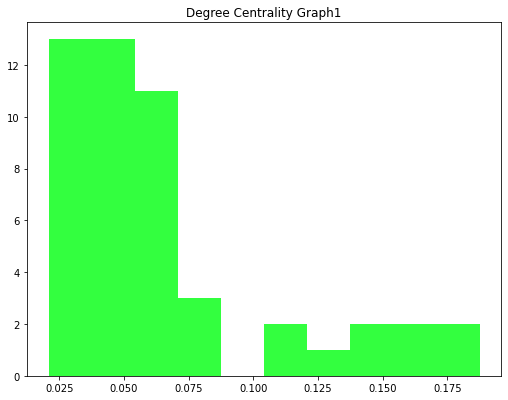

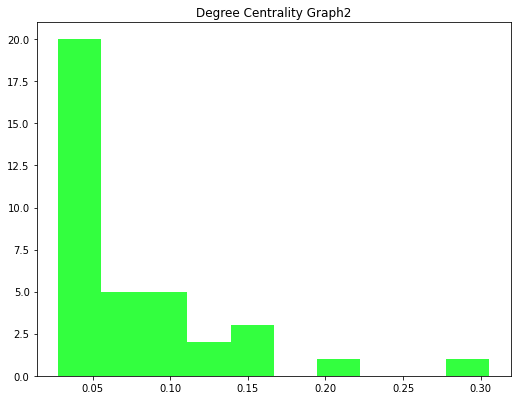

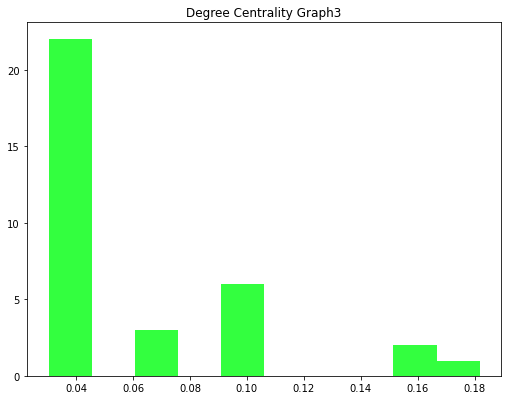

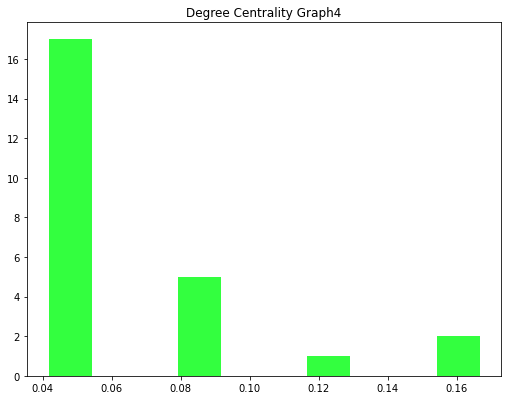

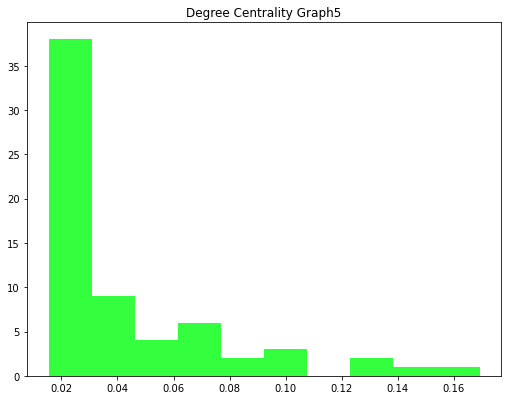

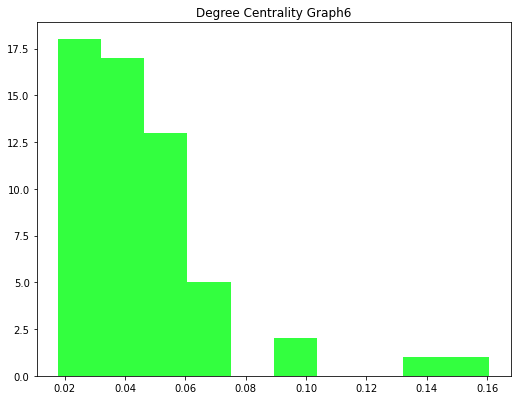

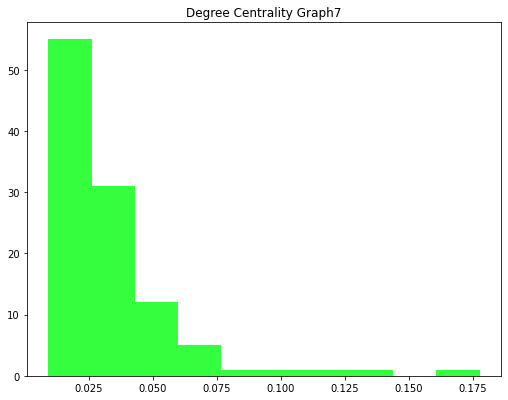

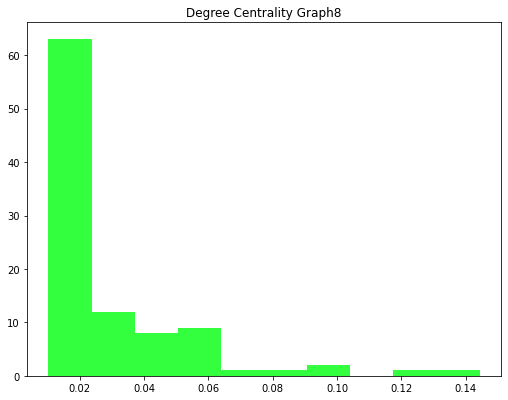

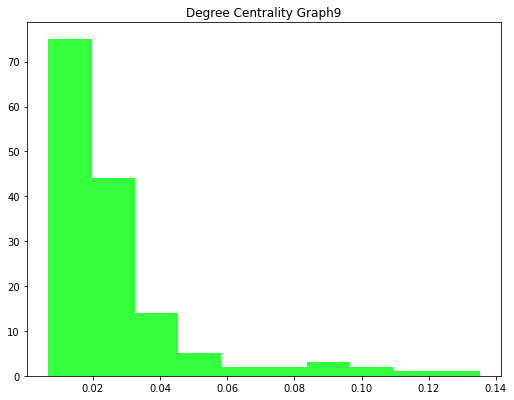

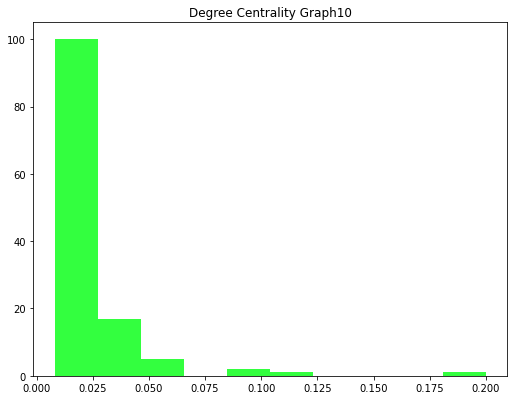

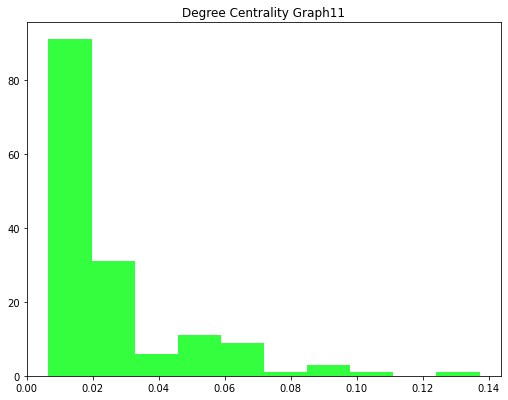

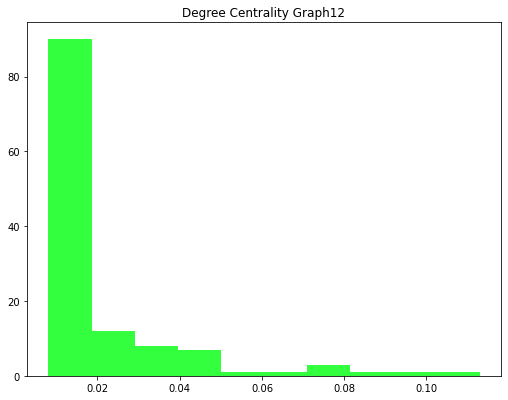

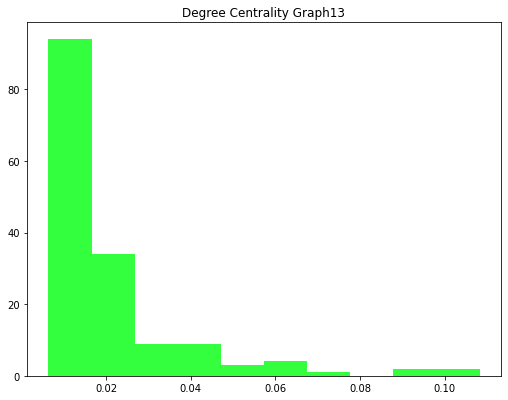

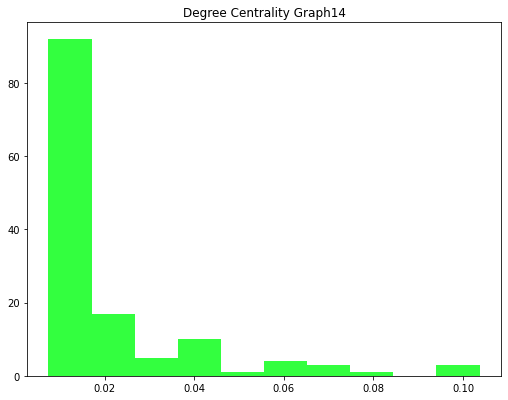

In [9]:
#We initialize dictionaries for each centrality measure
degree_centrality = {}

for i in range(0, N):
    degree_centrality["Graph{0}".format(i)] = nx.degree_centrality(sub_Graphs["Graph{0}".format(i)])

    #In order to be able to draw the centrality it needs to be passed as a Dataframe. 
    #In addition since degree_centrality is dict we get its values by converting it to list
    degree_centrality["Graph{0}".format(i)] = pd.DataFrame(list(degree_centrality["Graph{0}".format(i)].items()),
                                                                columns=['node', 'degree_centrality'])
    
    plt.figure(figsize=(8,4))
    plt.hist(degree_centrality["Graph{0}".format(i)]['degree_centrality'], facecolor='#33FF3F')
    plt.title('Degree Centrality Graph{0}'.format(i))
    fig = plt.gcf()
    fig.set_size_inches(8.5, 6.5)

    plt.show()

### In-Degree Centrality

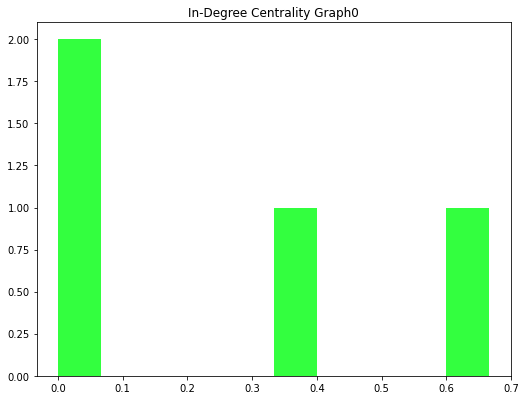

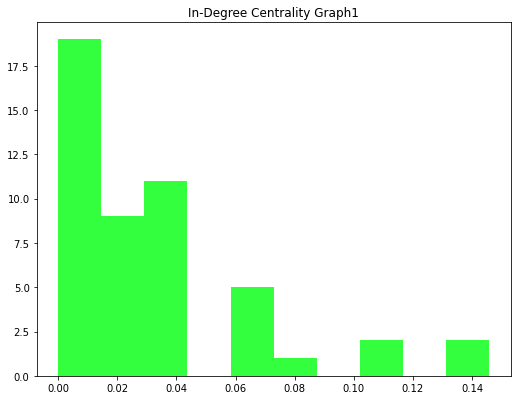

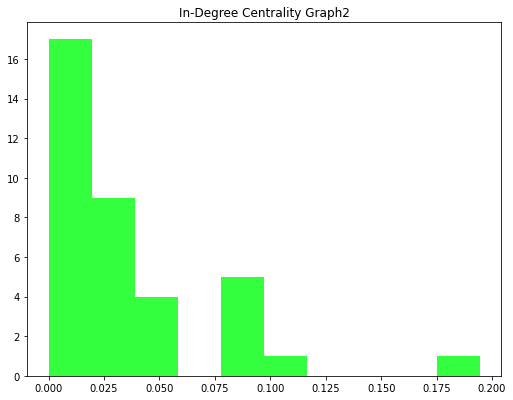

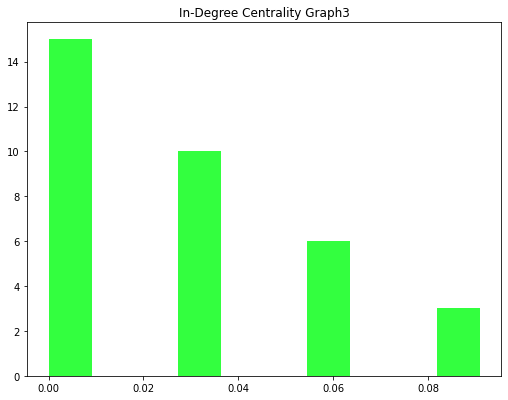

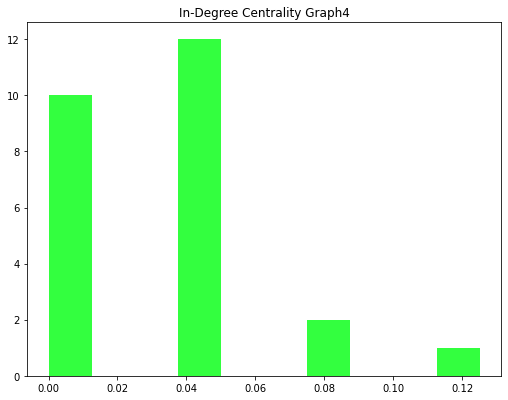

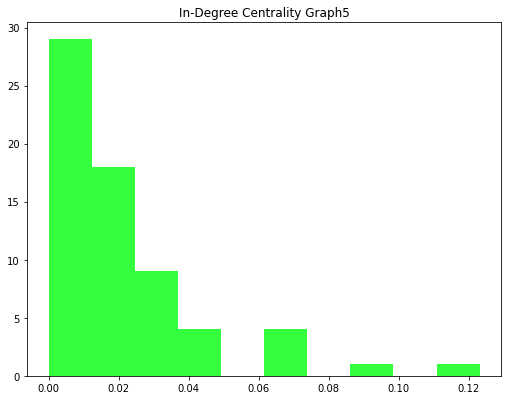

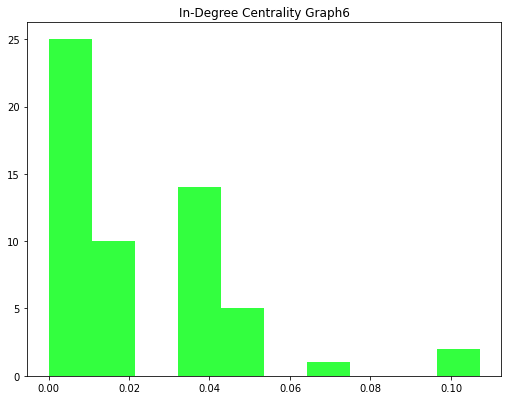

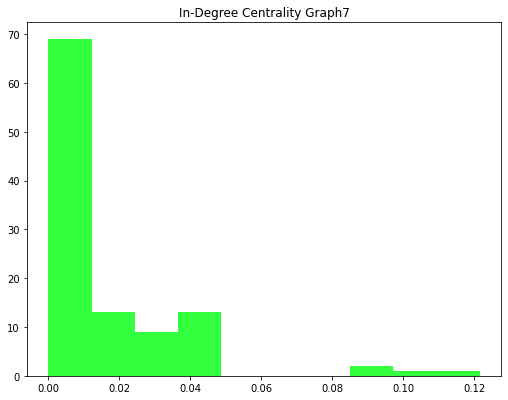

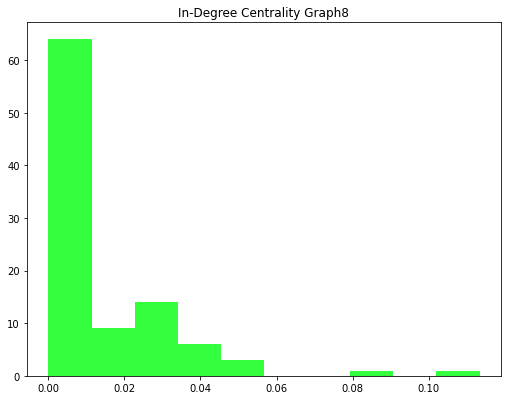

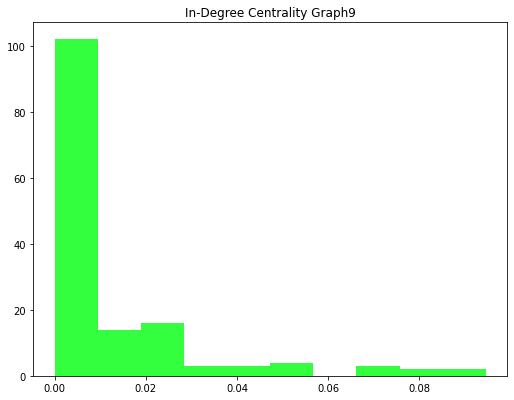

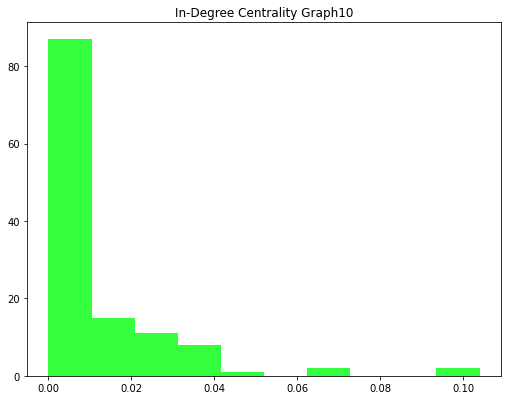

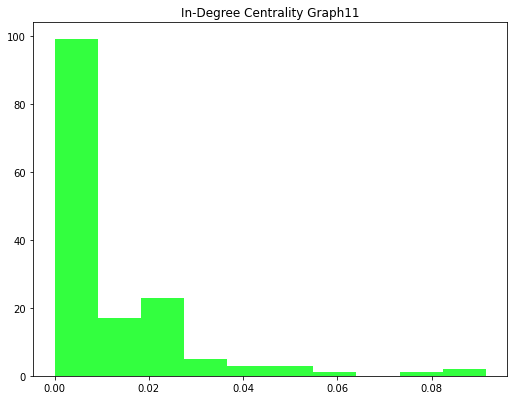

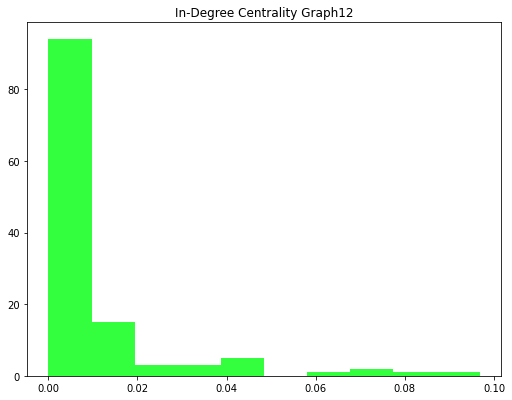

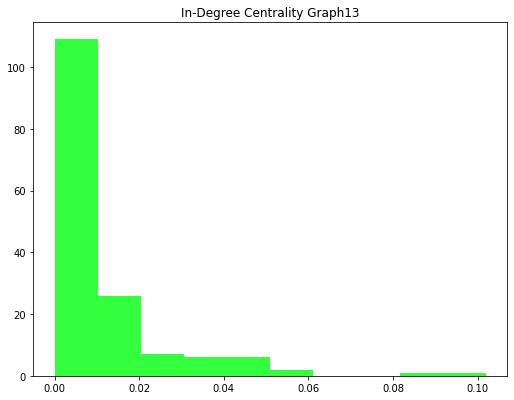

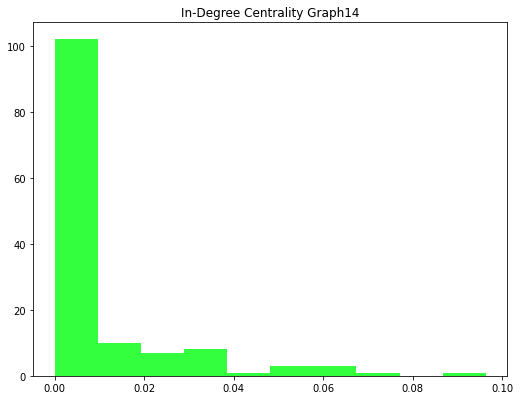

In [10]:
#We initialize dictionaries for each centrality measure
in_degree_centrality = {}

for i in range(0, N):
    in_degree_centrality["Graph{0}".format(i)] = nx.in_degree_centrality(sub_Graphs["Graph{0}".format(i)])
    in_degree_centrality["Graph{0}".format(i)] = pd.DataFrame(list(in_degree_centrality["Graph{0}".format(i)].items()),
                                                                columns=['node', 'in_degree_centrality'])
    
    plt.figure(figsize=(8,4))
    plt.hist(in_degree_centrality["Graph{0}".format(i)]['in_degree_centrality'], facecolor='#33FF3F')
    plt.title('In-Degree Centrality Graph{0}'.format(i))
    fig = plt.gcf()
    fig.set_size_inches(8.5, 6.5)

    plt.show()

### Out-Degree Centrality

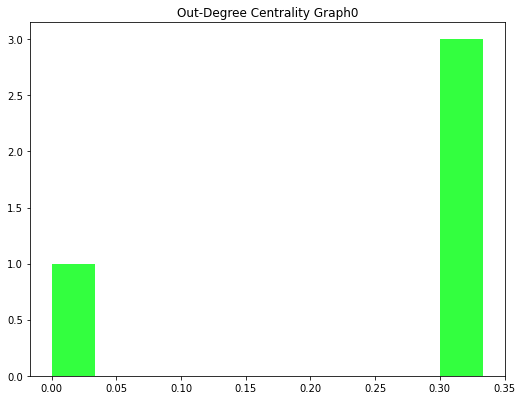

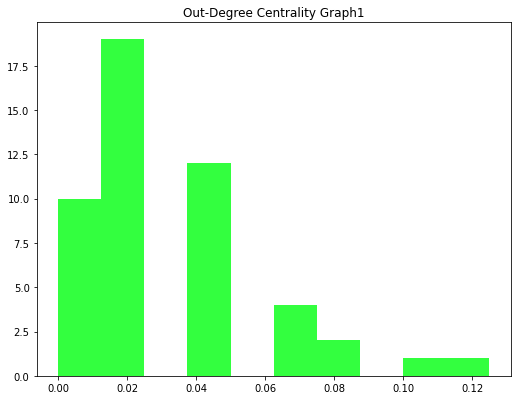

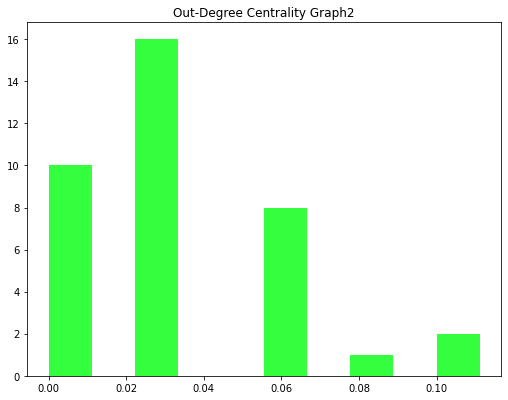

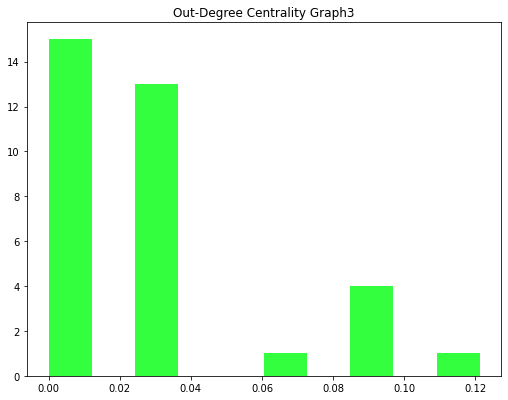

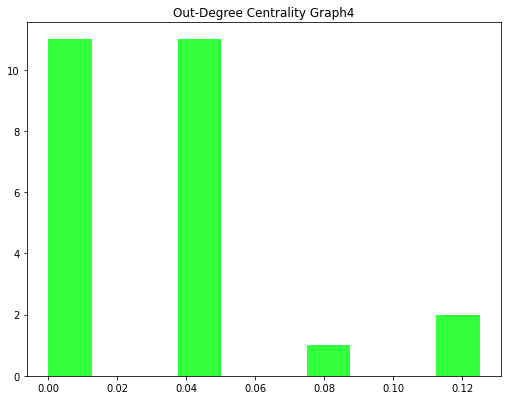

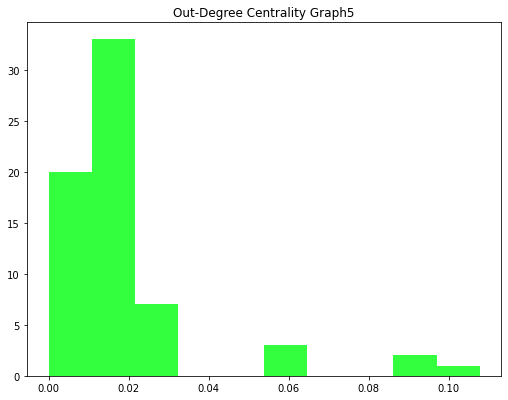

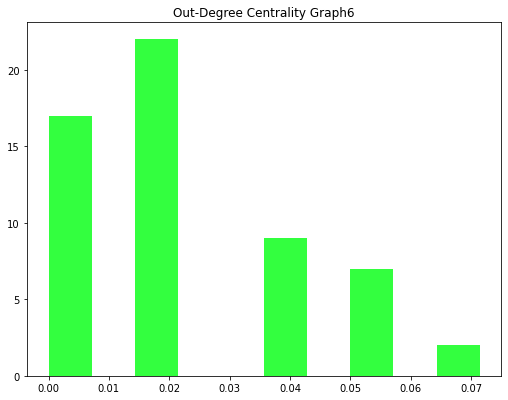

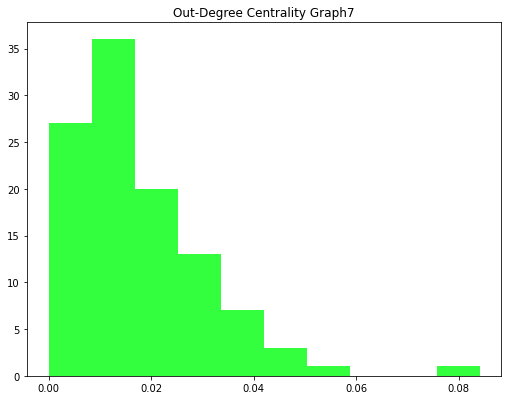

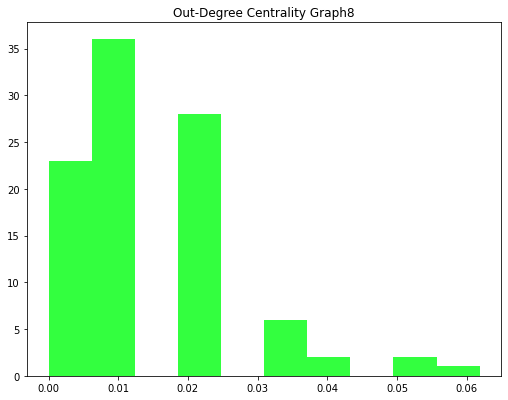

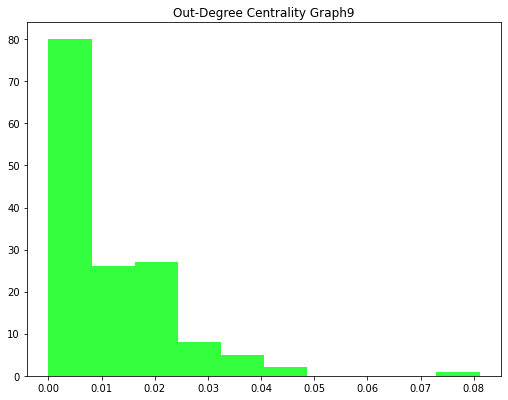

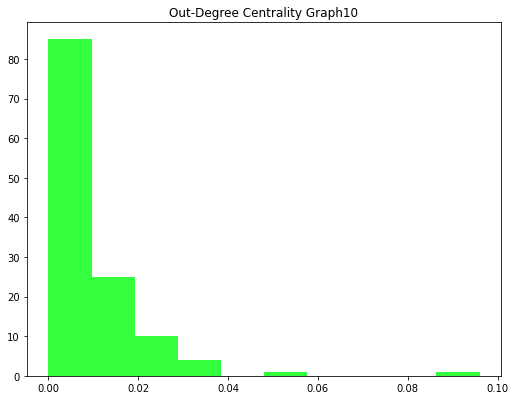

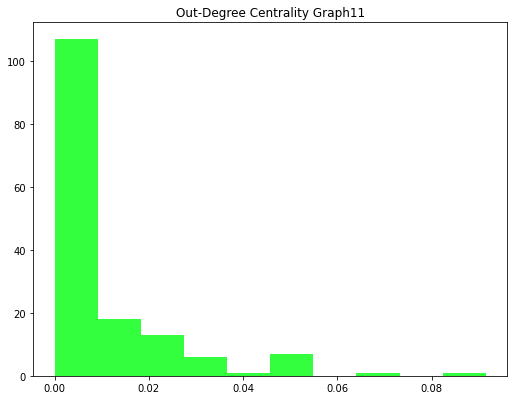

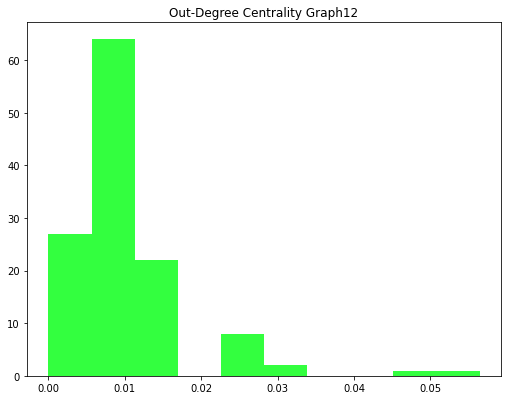

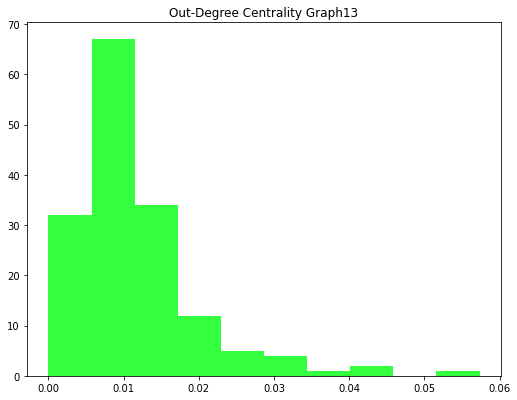

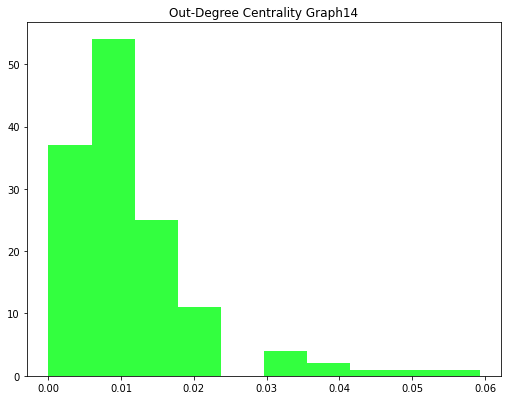

In [11]:
#We initialize dictionaries for each centrality measure
out_degree_centrality = {}

for i in range(0, N):
    out_degree_centrality["Graph{0}".format(i)] = nx.out_degree_centrality(sub_Graphs["Graph{0}".format(i)])
    out_degree_centrality["Graph{0}".format(i)] = pd.DataFrame(list(out_degree_centrality["Graph{0}".format(i)].items()),
                                                                columns=['node', 'out_degree_centrality'])
    
    plt.figure(figsize=(8,4))
    plt.hist(out_degree_centrality["Graph{0}".format(i)]['out_degree_centrality'], facecolor='#33FF3F')
    plt.title('Out-Degree Centrality Graph{0}'.format(i))
    fig = plt.gcf()
    fig.set_size_inches(8.5, 6.5)

    plt.show()

### Closeness Centrality

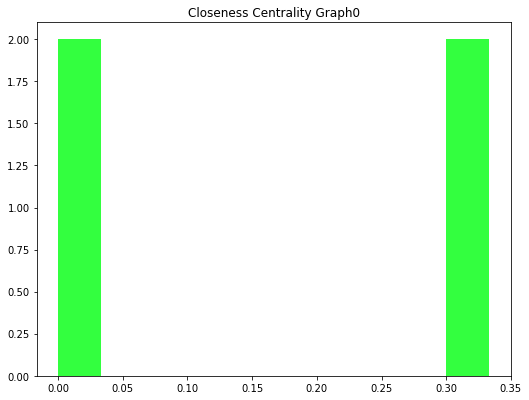

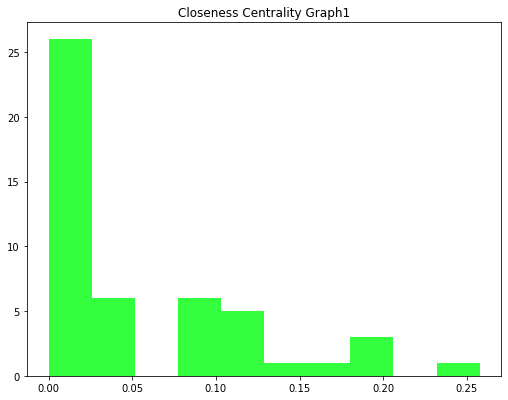

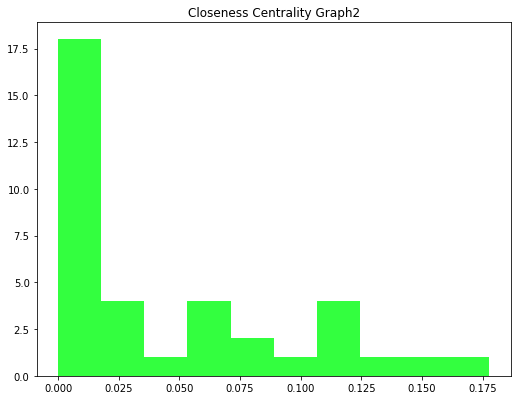

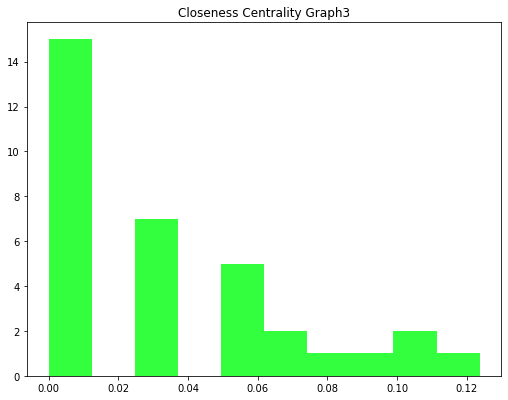

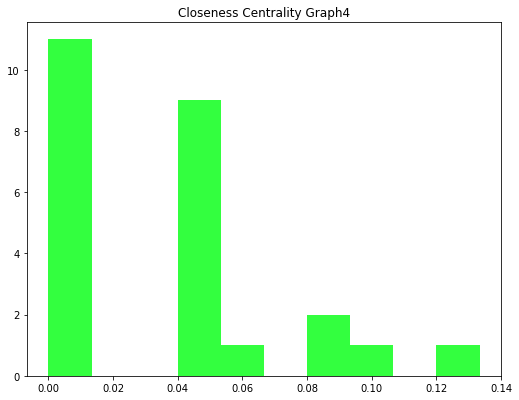

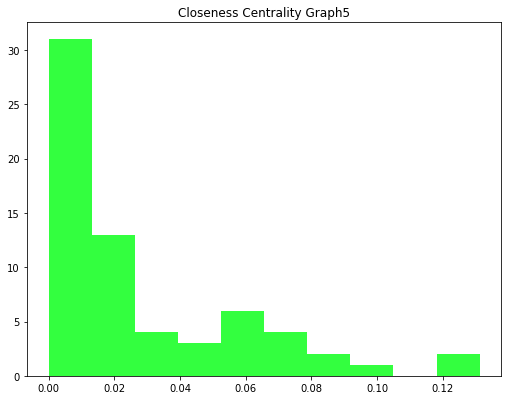

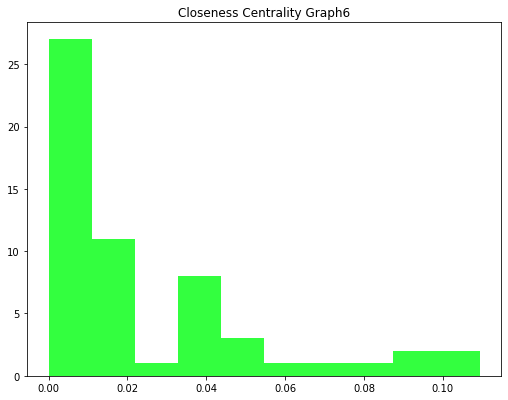

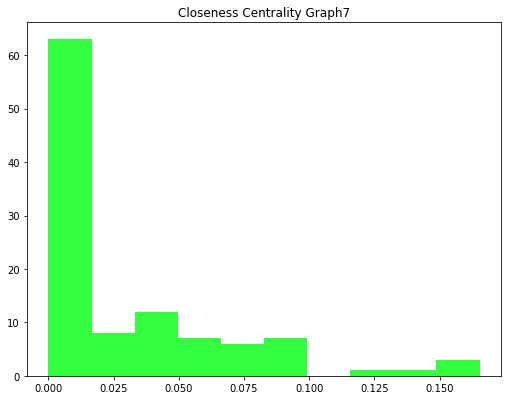

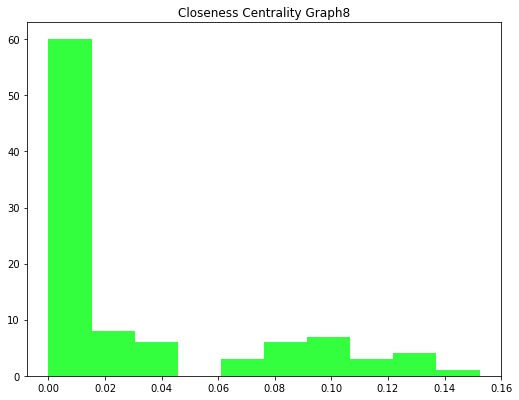

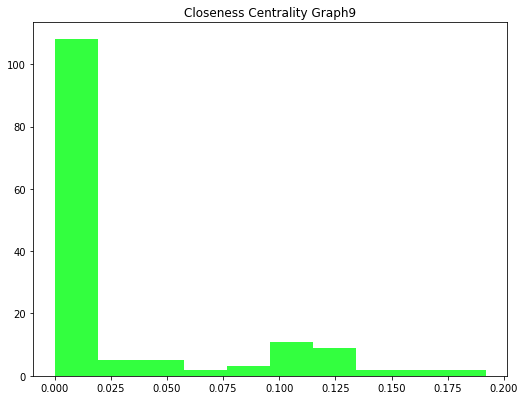

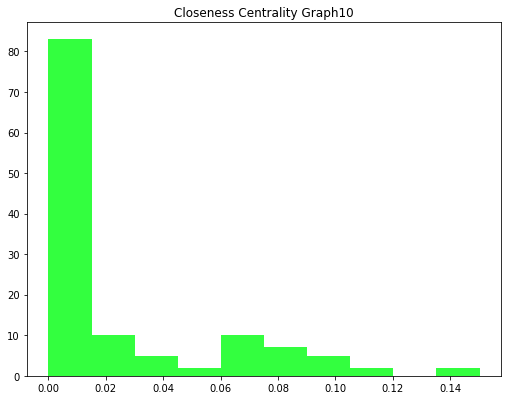

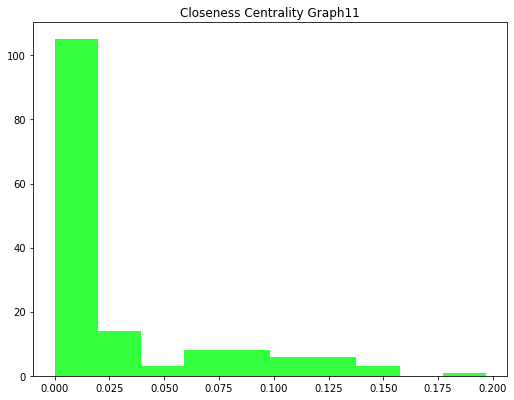

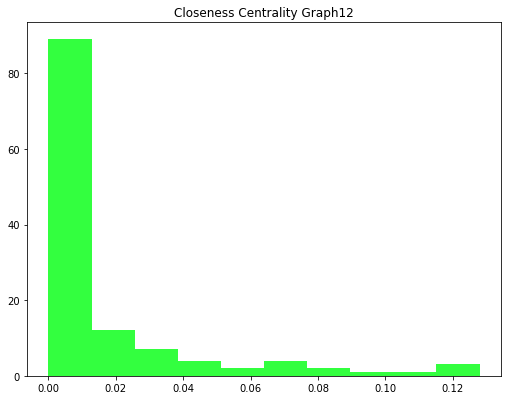

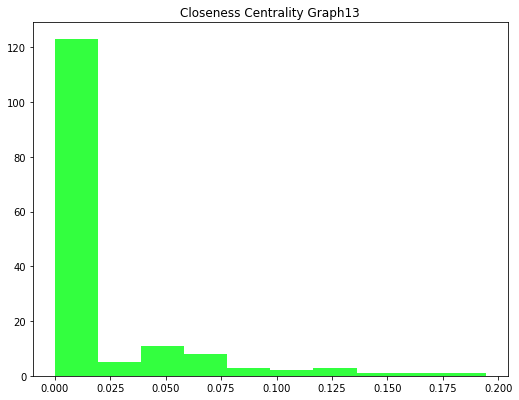

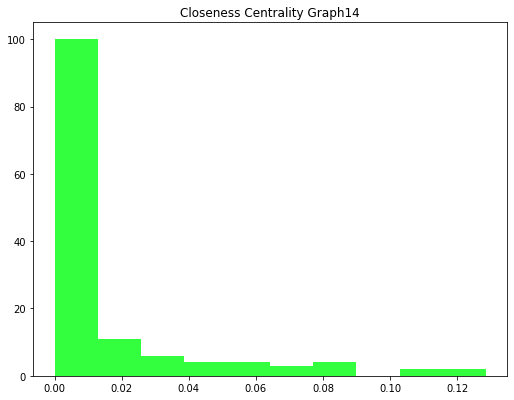

In [12]:
#We initialize dictionaries for each centrality measure
closeness_centrality = {}

for i in range(0, N):
    closeness_centrality["Graph{0}".format(i)] = nx.closeness_centrality(sub_Graphs["Graph{0}".format(i)])
    closeness_centrality["Graph{0}".format(i)] = pd.DataFrame(list(closeness_centrality["Graph{0}".format(i)].items()),
                                                                columns=['node', 'closeness_centrality'])
    
    plt.figure(figsize=(8,4))
    plt.hist(closeness_centrality["Graph{0}".format(i)]['closeness_centrality'], facecolor='#33FF3F')
    plt.title('Closeness Centrality Graph{0}'.format(i))
    fig = plt.gcf()
    fig.set_size_inches(8.5, 6.5)

    plt.show()

### Betweeness Centrality

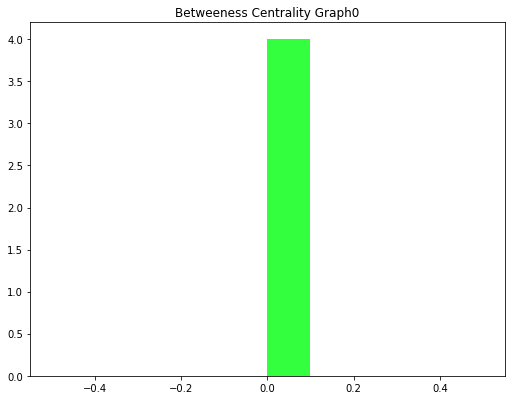

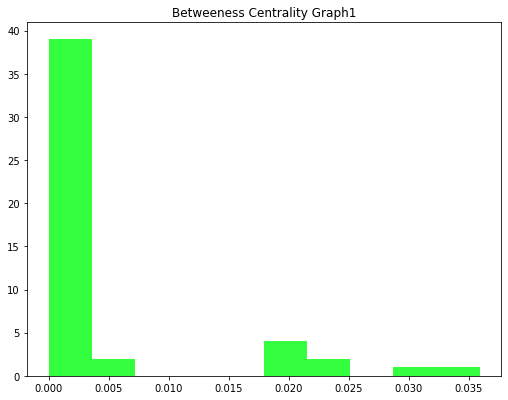

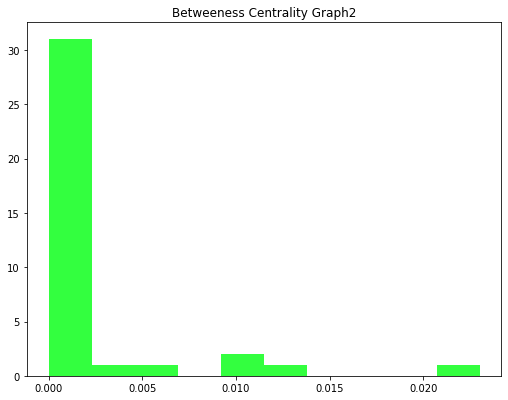

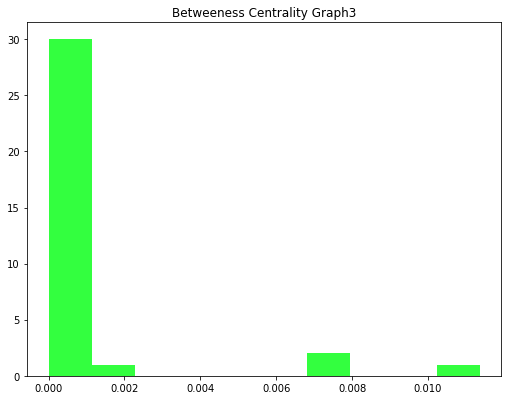

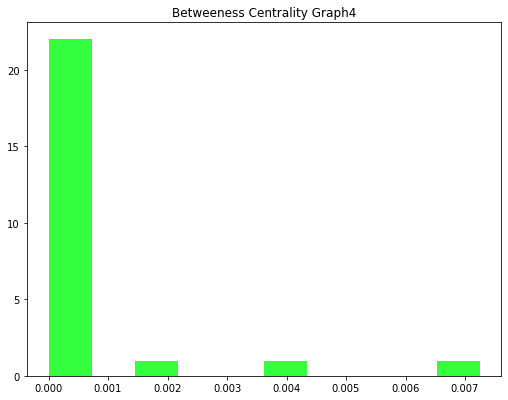

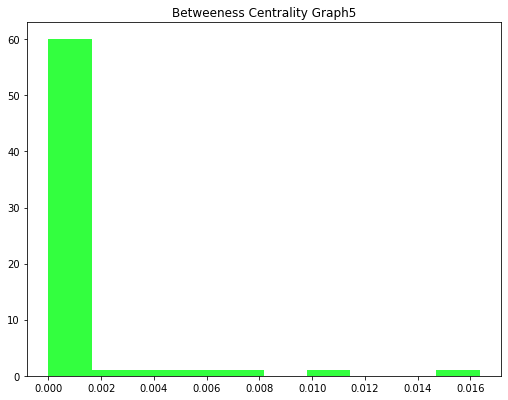

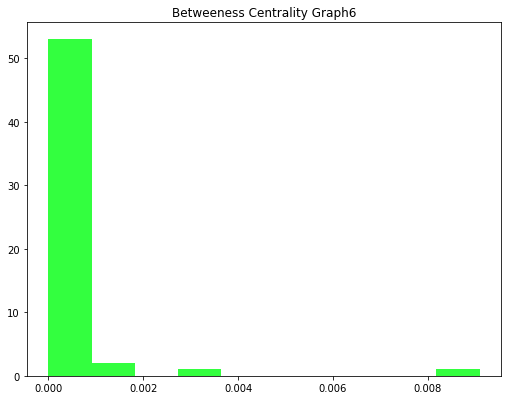

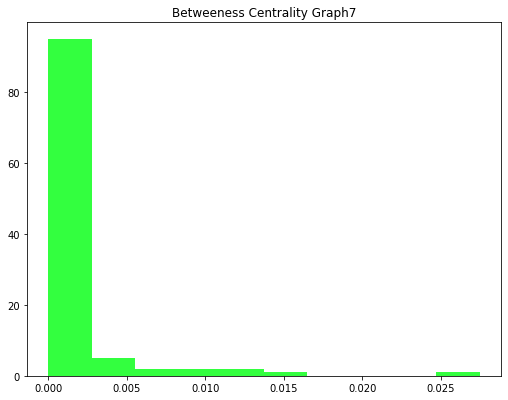

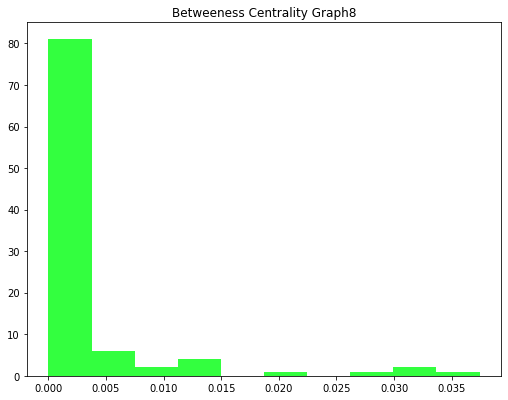

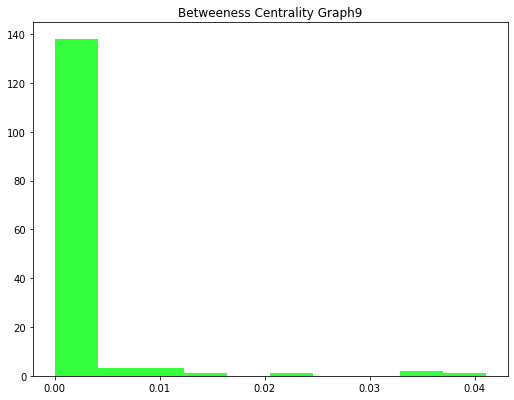

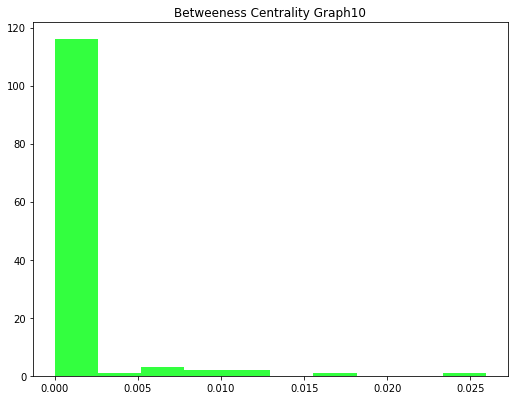

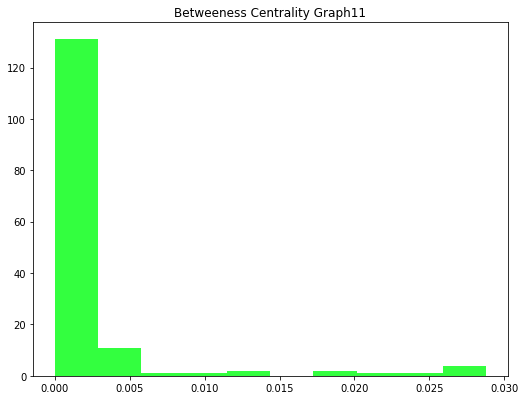

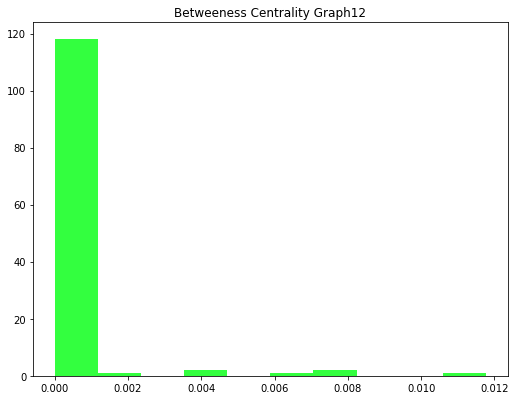

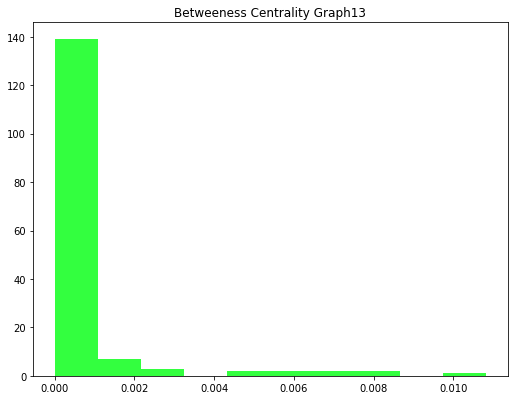

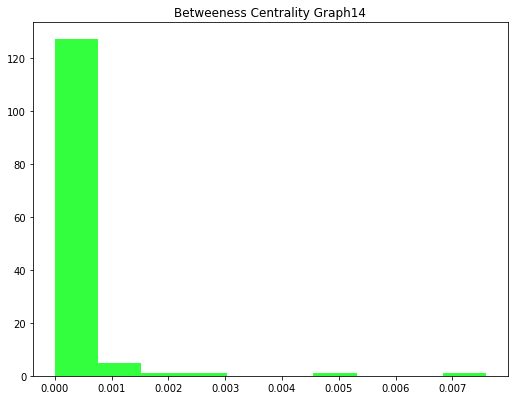

In [13]:
#We initialize dictionaries for each centrality measure
betweenness_centrality = {}

for i in range(0, N):
    betweenness_centrality["Graph{0}".format(i)] = nx.betweenness_centrality(sub_Graphs["Graph{0}".format(i)])
    betweenness_centrality["Graph{0}".format(i)] = pd.DataFrame(list(betweenness_centrality["Graph{0}".format(i)].items()),
                                                                columns=['node', 'betweenness_centrality'])
    
    plt.figure(figsize=(8,4))
    plt.hist(betweenness_centrality["Graph{0}".format(i)]['betweenness_centrality'], facecolor='#33FF3F')
    plt.title('Betweeness Centrality Graph{0}'.format(i))
    fig = plt.gcf()
    fig.set_size_inches(8.5, 6.5)

    plt.show()

### Eigenvector Centrality

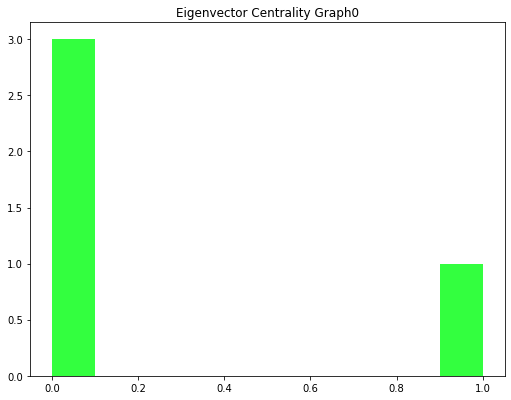

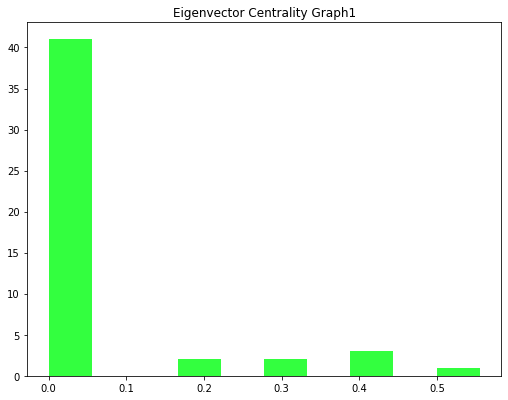

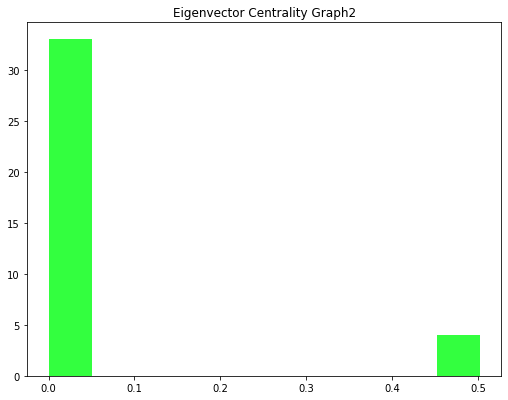

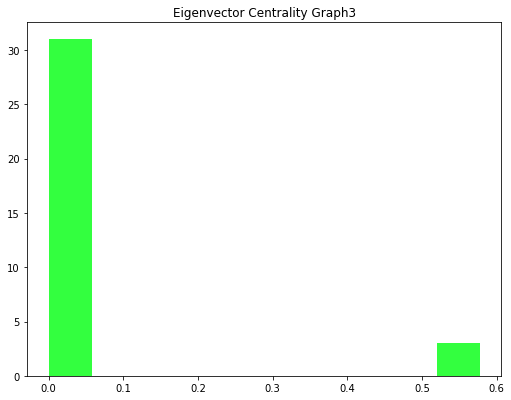

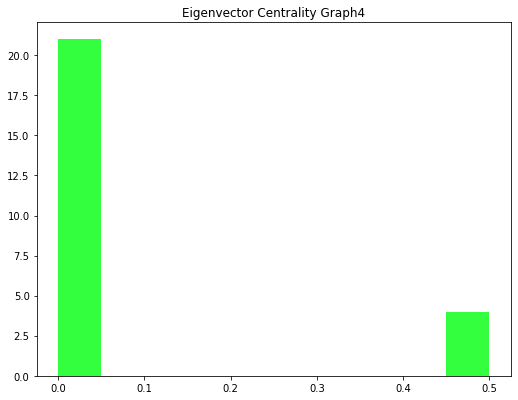

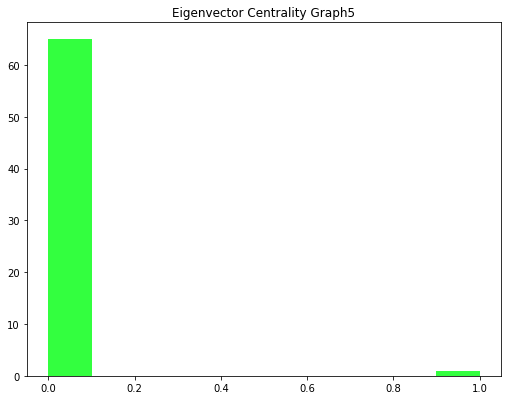

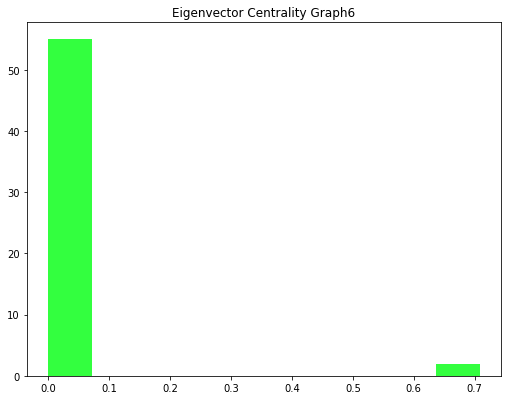

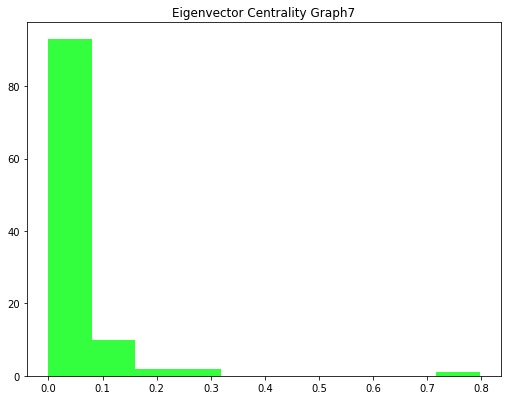

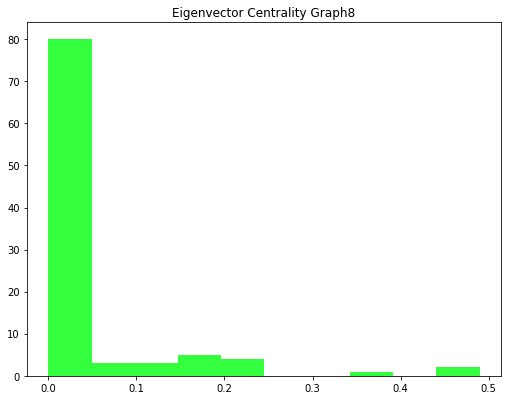

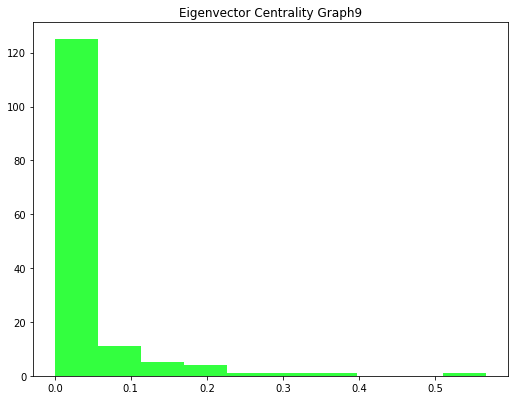

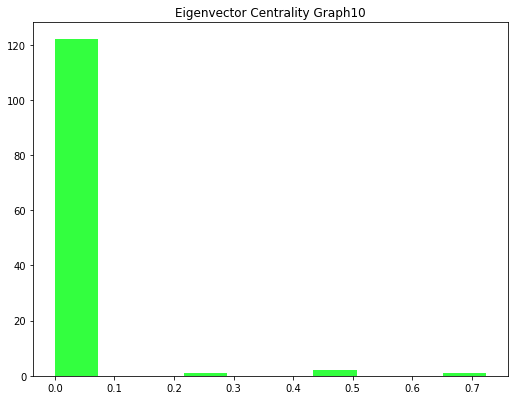

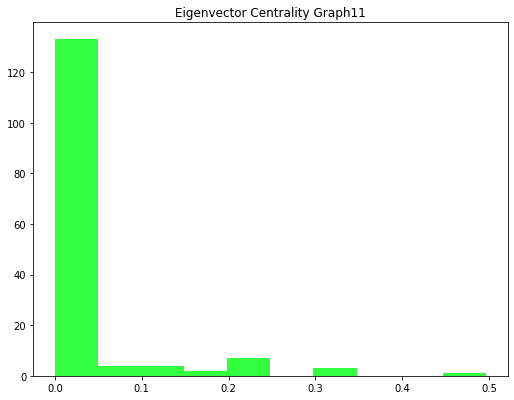

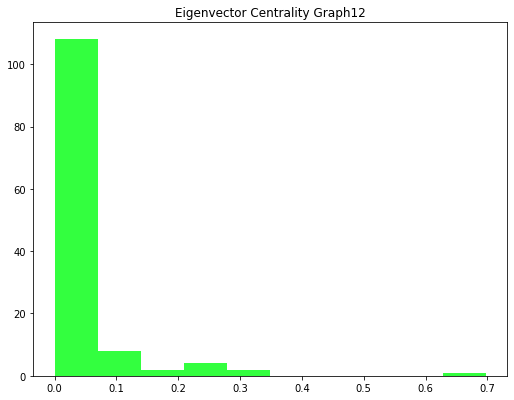

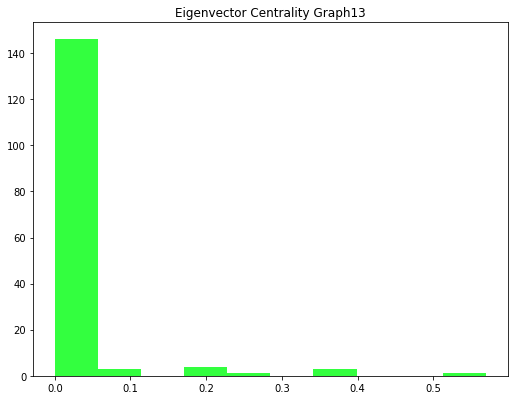

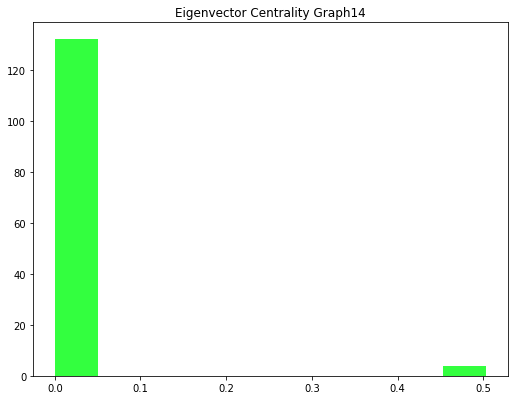

In [14]:
#We initialize dictionaries for each centrality measure
eigenvector_centrality = {}

for i in range(0, N):
    #For eigenvector to work we need to add a max_iter=1000 else it crashes from its default limit
    eigenvector_centrality["Graph{0}".format(i)] = nx.eigenvector_centrality(sub_Graphs["Graph{0}".format(i)],max_iter=1000)
    eigenvector_centrality["Graph{0}".format(i)] = pd.DataFrame(list(eigenvector_centrality["Graph{0}".format(i)].items()),
                                                                columns=['node', 'eigenvector_centrality'])
    
    plt.figure(figsize=(8,4))
    plt.hist(eigenvector_centrality["Graph{0}".format(i)]['eigenvector_centrality'], facecolor='#33FF3F')
    plt.title('Eigenvector Centrality Graph{0}'.format(i))
    fig = plt.gcf()
    fig.set_size_inches(8.5, 6.5)

    plt.show()

### Katz Centrality

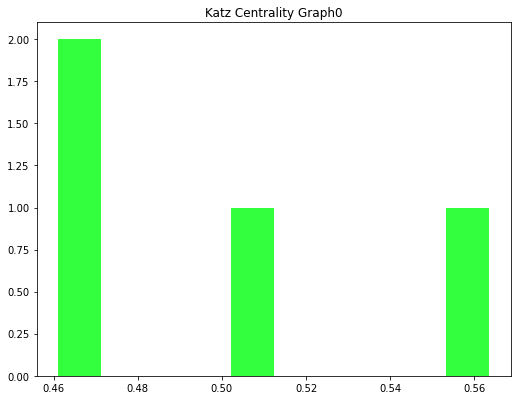

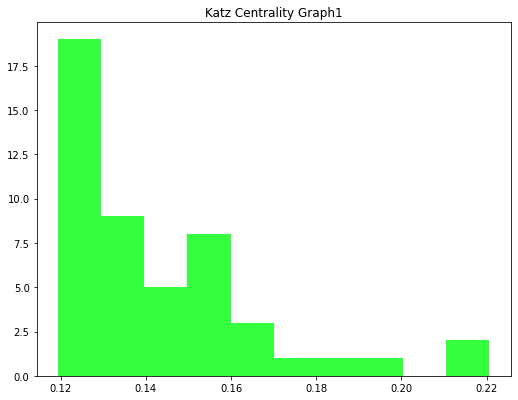

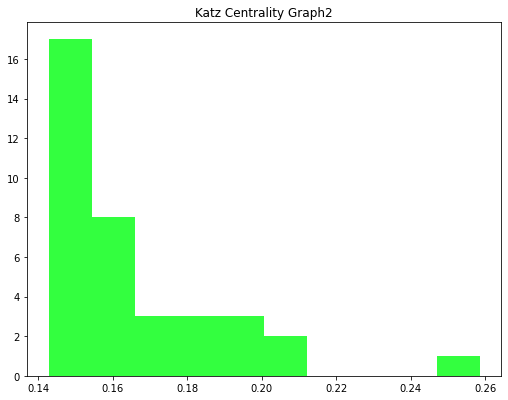

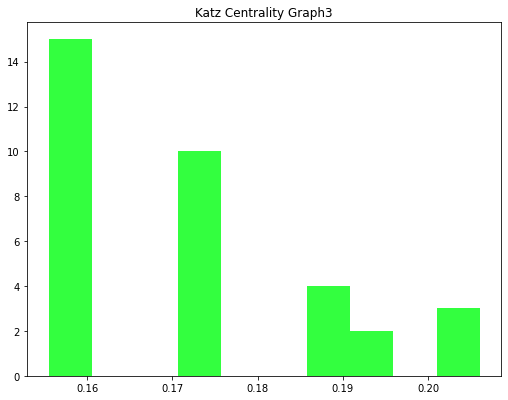

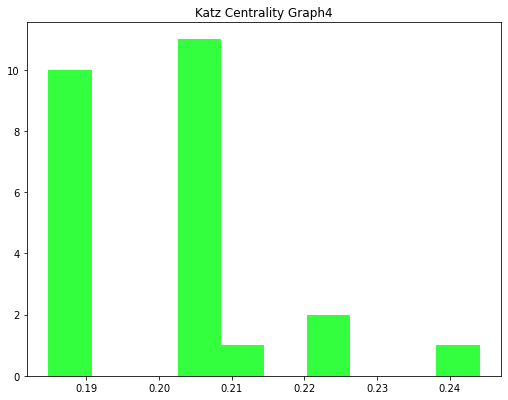

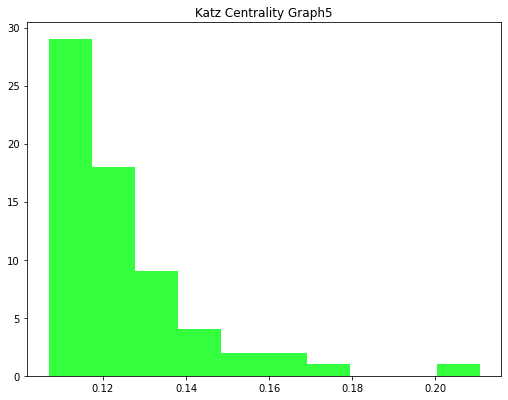

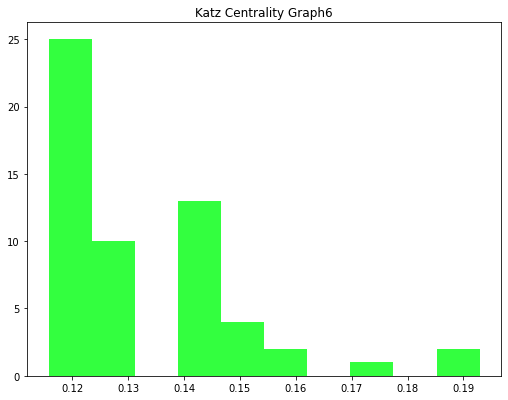

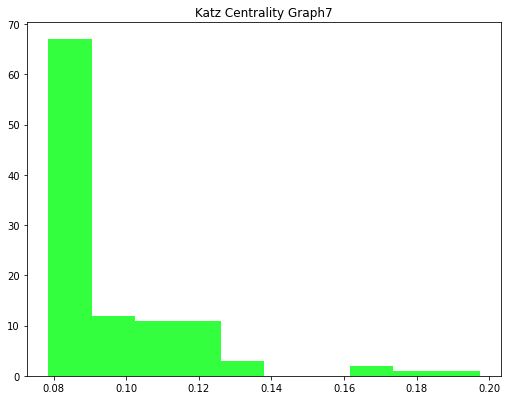

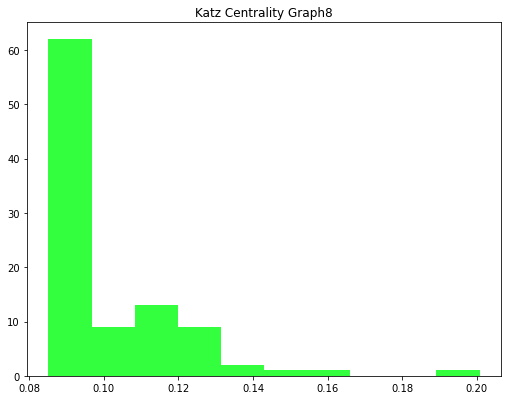

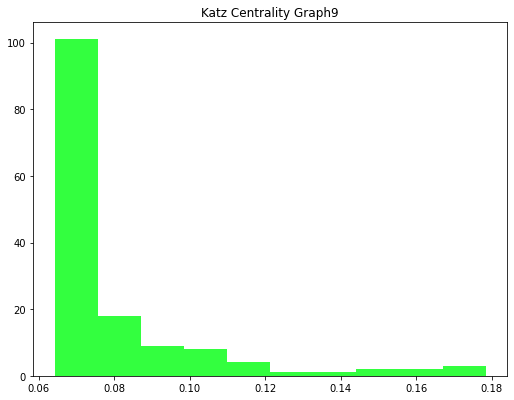

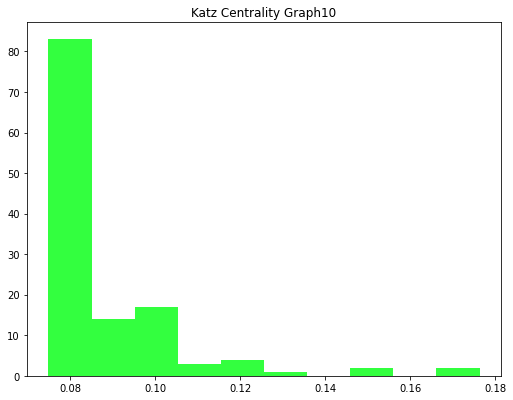

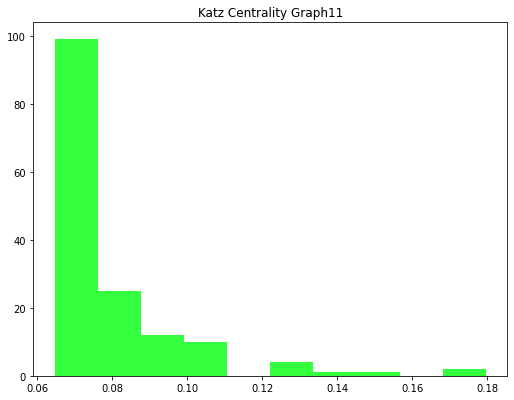

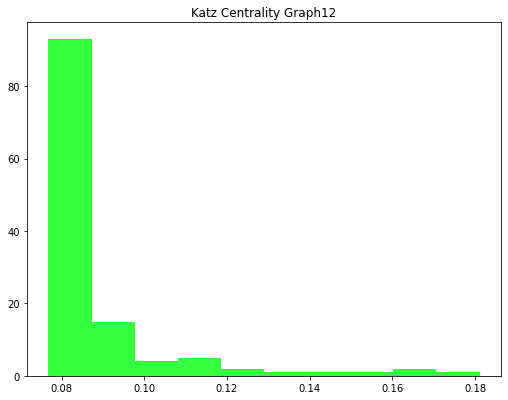

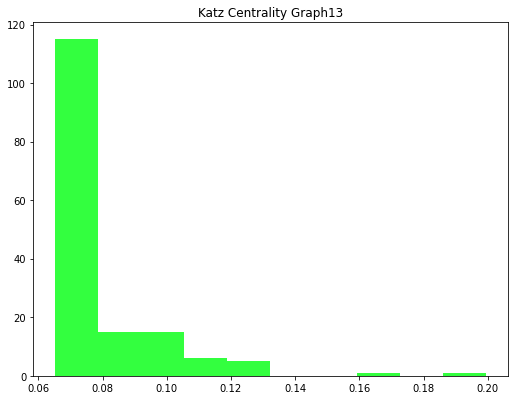

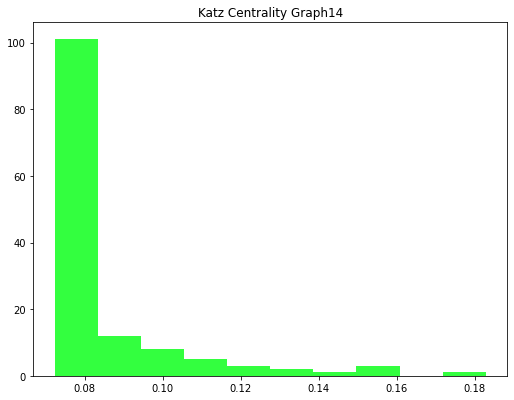

In [15]:
#We initialize dictionaries for each centrality measure
katz_centrality = {}

for i in range(0, N):
    #For katz to work we need to add a max_iter=5000 else it crashes from its default limit
    katz_centrality["Graph{0}".format(i)] = nx.katz_centrality(sub_Graphs["Graph{0}".format(i)],max_iter=5000)
    katz_centrality["Graph{0}".format(i)] = pd.DataFrame(list(katz_centrality["Graph{0}".format(i)].items()),
                                                                columns=['node', 'katz_centrality'])
    
    plt.figure(figsize=(8,4))
    plt.hist(katz_centrality["Graph{0}".format(i)]['katz_centrality'], facecolor='#33FF3F')
    plt.title('Katz Centrality Graph{0}'.format(i))
    fig = plt.gcf()
    fig.set_size_inches(8.5, 6.5)

    plt.show()

# Question 5

## Calculate V* and E*

In [16]:
intersection_V = {}
intersection_E = {}

for i in range(0, N-1):
    #We find the nodes for each subgraph the intersection for V,E
    list1= sub_Graphs["Graph{0}".format(i)].nodes()
    list2= sub_Graphs["Graph{0}".format(i+1)].nodes()
    
    intersection_V["V{0}".format(i)] = list(set(list1).intersection(list2))

    intersection_E["E{0}-V{1}".format(i,i)] = []
    intersection_E["E{0}-V{1}".format(i+1,i)] = []
    
    #For each subgraph we find the common nodes and common edges
    for j in intersection_V["V{0}".format(i)]:
        for source,target in sub_Graphs["Graph{0}".format(i)].edges(j):
            intersection_E["E{0}-V{1}".format(i,i)].append((source,target)) 

    for j in intersection_V["V{0}".format(i)]:
        for source,target in sub_Graphs["Graph{0}".format(i+1)].edges(j):
            intersection_E["E{0}-V{1}".format(i+1,i)].append((source,target))

# Question 6

## Similarity Tables

### Shortest Graph Distance

In [17]:
shortest_distance = {}
current_graph = {}

for i in range(0, N-1):

    current_graph["E{0}-V{1}".format(i,i)]=nx.Graph()
    
    #We fill an empty graph with nodes from the edges collected before
    for source,target in intersection_E["E{0}-V{1}".format(i,i)]:
        current_graph["E{0}-V{1}".format(i,i)].add_nodes_from([source,target])
        current_graph["E{0}-V{1}".format(i,i)].add_edge(source,target)

    shortest_distance["V{0}".format(i)]=[]
    
    for j in intersection_V["V{0}".format(i)]:
        for k in intersection_V["V{0}".format(i)]:
            
            if(j in current_graph["E{0}-V{1}".format(i,i)].nodes() and k in current_graph["E{0}-V{1}".format(i,i)].nodes() and nx.has_path(current_graph["E{0}-V{1}".format(i,i)], source = j,target = k)):
                shortest_distance["V{0}".format(i)].append([j,k,
                                                            nx.shortest_path_length(current_graph["E{0}-V{1}".format(i,i)], 
                                                            source = j,
                                                            target = k)])


### Common Neighbors

Common neighbors captures the idea that two nodes who have a connection in common are more likely to be introduced than those who don't have any connection in common.

In [18]:
common_neighbors = {}

for i in range(0, N-1):
    
    common_neighbors["V{0}".format(i)]=[]
    
    for j in intersection_V["V{0}".format(i)]:
        for k in intersection_V["V{0}".format(i)]:
            if(j in current_graph["E{0}-V{1}".format(i,i)].nodes() and k in current_graph["E{0}-V{1}".format(i,i)].nodes()):
                
                common_neighbors["V{0}".format(i)].append([j,k,len(sorted(nx.common_neighbors(current_graph["E{0}-V{1}".format(i,i)], j, k)))])

### Jaccard’s Coefficient

Jaccard’s Coefficient compares nodes for two sets to see which nodes are shared and which are distinct.

In [19]:
jaccard_coefficient = {}

for i in range(0, N-1):
    
    jaccard_coefficient["V{0}".format(i)]=[]
    
    for j in intersection_V["V{0}".format(i)]:
        for k in intersection_V["V{0}".format(i)]:
            if(j in current_graph["E{0}-V{1}".format(i,i)].nodes() and k in current_graph["E{0}-V{1}".format(i,i)].nodes()):
                
                temp_list = nx.jaccard_coefficient(current_graph["E{0}-V{1}".format(i,i)],[(j,k)])

                for source,target,result in temp_list:
                    
                    jaccard_coefficient["V{0}".format(i)].append([source,target,result])

### Adamic/Adar

Adamic/Adar predict links in a social network, according to the amount of shared links between two nodes.

In [20]:
adamic_adar = {}

for i in range(0, N-1):
    
    adamic_adar["V{0}".format(i)] = []
    
    for j in intersection_V["V{0}".format(i)]:
        for k in intersection_V["V{0}".format(i)]:
            
            #We check if j and k nodes from the intersection exist in the graph of edges
            #We also use common neighbors to check if the two nodes have more than one neighbor to avoid error of division by 0
            if(j in current_graph["E{0}-V{1}".format(i,i)].nodes() and k in current_graph["E{0}-V{1}".format(i,i)].nodes() and len(sorted(nx.common_neighbors(current_graph["E{0}-V{1}".format(i,i)], j, k))) > 1):
                    
                #We check if one of them has degree less than two, so that we avoid more errors
                for l in sorted(nx.common_neighbors(current_graph["E{0}-V{1}".format(i,i)], j, k)):
                        
                    if(current_graph["E{0}-V{1}".format(i,i)].degree(l) <= 1):
                        break;

                
                if (current_graph["E{0}-V{1}".format(i,i)].degree(l) > 1):
                    #If no degrees are 0 or 1 then we run the algorithm
                    temp_list = nx.adamic_adar_index(current_graph["E{0}-V{1}".format(i,i)],[(j,k)])
                    for source,target,result in temp_list:
                        adamic_adar["V{0}".format(i)].append([source,target,result])


### Preferential Attachment

Preferential Attachment calculates the likelihood  that more connected a node is, the more likely it is to receive new links. Nodes with higher degree have stronger ability to attract links added to the network.

In [21]:
preferential_attachment = {}

for i in range(0, N-1):
    
    preferential_attachment["V{0}".format(i)] = []
    
    for j in intersection_V["V{0}".format(i)]:
        for k in intersection_V["V{0}".format(i)]:
            if(j in current_graph["E{0}-V{1}".format(i,i)].nodes() and k in current_graph["E{0}-V{1}".format(i,i)].nodes()):
                
                temp_list = nx.preferential_attachment(current_graph["E{0}-V{1}".format(i,i)],[(j,k)])
                
                for source,target,result in temp_list:
                    preferential_attachment["V{0}".format(i)].append([source,target,result])
                    

# Question 7

## Successfull percentage on similarity tables

In [23]:
percentage_Input = int(input("Please give percentage parameter: "))

shortest_success = {}
common_success = {}
jaccard_success = {}
adamic_success = {}
preferential_success = {}

for i in range(0, N-1):
    
    #We create dataframes from the dictionaries
    df_shortest_distance = pd.DataFrame(shortest_distance["V{0}".format(i)],columns=['source','target','result'])
    
    df_common_neighbors = pd.DataFrame(common_neighbors["V{0}".format(i)],columns=['source','target','result'])
    
    df_jaccard = pd.DataFrame(jaccard_coefficient["V{0}".format(i)],columns=['source','target','result'])
    
    df_adamic_adar = pd.DataFrame(adamic_adar["V{0}".format(i)],columns=['source','target','result'])
    
    df_preferential_attachment = pd.DataFrame(preferential_attachment["V{0}".format(i)],columns=['source','target','result'])
    
    
    #We extract the size of the dataframe according to the percentage given by user
    df_size = int((percentage_Input/100) * len(df_shortest_distance))
    p_shortest_distance = df_shortest_distance[:df_size]
    
    df_size = int((percentage_Input/100) * len(df_common_neighbors))
    p_common_neighbors = df_common_neighbors[:df_size]
    
    df_size = int((percentage_Input/100) * len(df_jaccard))
    p_df_jaccard = df_jaccard[:df_size]
    
    df_size = int((percentage_Input/100) * len(df_adamic_adar))
    p_adamic_adar = df_adamic_adar[:df_size]
    
    df_size = int((percentage_Input/100) * len(df_preferential_attachment))
    p_preferential_attachment = df_preferential_attachment[:df_size]
    
    #We convert the previous dataframes to lists
    shortest_list = p_shortest_distance.values.tolist()
    common_list = p_common_neighbors.values.tolist()
    jaccard_list = p_df_jaccard.values.tolist()
    adamic_list = p_adamic_adar.values.tolist()
    preferential_list = p_preferential_attachment.values.tolist()
    
    #We calculate the success for each
    counter = 0
    for source,target,result in shortest_list:
        for sourceE,targetE in intersection_E["E{0}-V{1}".format(i+1,i)]:
            if(int(source)==sourceE and int(target)==targetE):
                counter +=1    
    shortest_success["E{0}-V{1}".format(i+1,i)] = (counter/len(intersection_E["E{0}-V{1}".format(i+1,i)]))
    
    counter = 0
    for source,target,result in common_list:
        for sourceE,targetE in intersection_E["E{0}-V{1}".format(i+1,i)]:
            if(int(source)==sourceE and int(target)==targetE):
                counter +=1    
    common_success["E{0}-V{1}".format(i+1,i)] = (counter/len(intersection_E["E{0}-V{1}".format(i+1,i)]))
    
    counter = 0
    for source,target,result in jaccard_list:
        for sourceE,targetE in intersection_E["E{0}-V{1}".format(i+1,i)]:
            if(int(source)==sourceE and int(target)==targetE):
                counter +=1
    jaccard_success["E{0}-V{1}".format(i+1,i)] = (counter/len(intersection_E["E{0}-V{1}".format(i+1,i)]))
    
    counter = 0
    for source,target,result in adamic_list:
        for sourceE,targetE in intersection_E["E{0}-V{1}".format(i+1,i)]:
            if(int(source)==sourceE and int(target)==targetE):
                counter +=1    
    adamic_success["E{0}-V{1}".format(i+1,i)] = (counter/len(intersection_E["E{0}-V{1}".format(i+1,i)]))
    
    counter = 0
    for source,target,result in preferential_list:
        for sourceE,targetE in intersection_E["E{0}-V{1}".format(i+1,i)]:
            if(int(source)==sourceE and int(target)==targetE):
                counter +=1    
    preferential_success["E{0}-V{1}".format(i+1,i)] = (counter/len(intersection_E["E{0}-V{1}".format(i+1,i)]))

    counter = 0

Please give percentage parameter: 20


### Shortest Graph Distance

In [24]:
print(pd.DataFrame(shortest_success.items(), columns=['E-V', 'Success']))

        E-V   Success
0     E1-V0  0.000000
1     E2-V1  0.000000
2     E3-V2  0.000000
3     E4-V3  0.200000
4     E5-V4  0.000000
5     E6-V5  0.051282
6     E7-V6  0.016667
7     E8-V7  0.081081
8     E9-V8  0.096000
9    E10-V9  0.076190
10  E11-V10  0.064748
11  E12-V11  0.092105
12  E13-V12  0.026316
13  E14-V13  0.077778


### Common Neighbors

In [25]:
print(pd.DataFrame(common_success.items(), columns=['E-V', 'Success']))

        E-V   Success
0     E1-V0  0.000000
1     E2-V1  0.000000
2     E3-V2  0.142857
3     E4-V3  0.200000
4     E5-V4  0.000000
5     E6-V5  0.051282
6     E7-V6  0.050000
7     E8-V7  0.081081
8     E9-V8  0.112000
9    E10-V9  0.095238
10  E11-V10  0.071942
11  E12-V11  0.092105
12  E13-V12  0.061404
13  E14-V13  0.111111


### Jaccard’s Coefficient

In [26]:
print(pd.DataFrame(jaccard_success.items(), columns=['E-V', 'Success']))

        E-V   Success
0     E1-V0  0.000000
1     E2-V1  0.000000
2     E3-V2  0.142857
3     E4-V3  0.200000
4     E5-V4  0.000000
5     E6-V5  0.051282
6     E7-V6  0.050000
7     E8-V7  0.081081
8     E9-V8  0.112000
9    E10-V9  0.095238
10  E11-V10  0.071942
11  E12-V11  0.092105
12  E13-V12  0.061404
13  E14-V13  0.111111


### Adamic/Adar

In [27]:
print(pd.DataFrame(adamic_success.items(), columns=['E-V', 'Success']))

        E-V   Success
0     E1-V0  0.000000
1     E2-V1  0.000000
2     E3-V2  0.000000
3     E4-V3  0.000000
4     E5-V4  0.000000
5     E6-V5  0.000000
6     E7-V6  0.000000
7     E8-V7  0.013514
8     E9-V8  0.008000
9    E10-V9  0.019048
10  E11-V10  0.007194
11  E12-V11  0.000000
12  E13-V12  0.000000
13  E14-V13  0.000000


### Preferential Attachment

In [28]:
print(pd.DataFrame(preferential_success.items(), columns=['E-V', 'Succesfull']))

        E-V  Succesfull
0     E1-V0    0.000000
1     E2-V1    0.000000
2     E3-V2    0.142857
3     E4-V3    0.200000
4     E5-V4    0.000000
5     E6-V5    0.051282
6     E7-V6    0.050000
7     E8-V7    0.081081
8     E9-V8    0.112000
9    E10-V9    0.095238
10  E11-V10    0.071942
11  E12-V11    0.092105
12  E13-V12    0.061404
13  E14-V13    0.111111
